# <center>**Brazillian E-Commerce Notebook - Purwadhika DTI DS Final Project<center>**

---
## Team Gunner
1. Tony Joshua Pongoh
2. Rifqi Aria Bramantyo
3. Safira Fabilia

---
## **Table of Content**

1. **[Business Understanding](#bu)**<br>
  1.1.  **[Background](#bg)**<br>
  1.2.  **[Business Scenario](#bs)**<br>
  1.3.  **[Problem Statement](#ps)**<br>
  1.4.  **[Goals](#goals)**<br>
  1.5.  **[Analytic Approach](#aa)**<br>
2. **[Data Understanding](#du)**<br>
  2.1.  **[Column Description](#cd)**<br>
  2.2.  **[ERD](#erd)**<br>
  2.3.  **[Data Setup](#ds)**<br>
3. **[Data Preprocessing](#dp)**<br>
  3.1.  **[Data Merging](#dm)**<br>
  3.2.  **[Data Cleaning](#dc)**<br>
4. **[EDA](#eda)**
5. **[Modelling](#modelling)**
6. **[Final Thoughts](#fthoughts)**

---
<a id="bu"></a>
## **1. Business Understanding**

<a id="bg"></a>
### **1.1. Background**

[Olist](https://www.olist.com) is a Brazilian e-commerce marketplace integrator that serves as an online platform for aggregating e-commerce sites, making it easier for businesses to sell directly on various Brazilian e-commerce platforms. The platform connects entrepreneurs with major online retailers, allowing shopkeepers to effortlessly advertise and sell their products across multiple marketplaces. This enables retail companies to expand their reach to international markets, enhance the shopping experience, and influence customer purchasing behavior.

Olist simplifies the process for small businesses across Brazil by providing access to various sales channels through a single contract. Merchants can list their products on the Olist Store and fulfill orders using Olist's logistics partners. After a customer makes a purchase from the Olist Store, the seller is notified to fulfill the order. Once the product is delivered, or when the estimated delivery date has passed, the customer receives a satisfaction survey via email to rate their shopping experience and provide feedback.

<a id="ps"></a>
### **1.2. Problem Statement**

Currently, Olist's marketing team lacks a customer segmentation strategy, treating all customers as a single homogeneous group. This approach fails to account for the diverse needs, preferences, and behaviors of different customer segments, leading to missed opportunities for targeted marketing efforts, personalized communication, and optimized customer experiences. As a result, Olist may struggle to effectively engage with its customers, potentially impacting customer satisfaction, retention rates, and overall sales growth. Developing a robust customer segmentation strategy is crucial to unlocking the full potential of Olist's marketing efforts and driving better business outcomes.

Some of the questions that will help us define the problems are:
1. Is there a noticeable upward trend in e-commerce sales within Brazil?
2. Which cities and states produce the most customers, and which product categories have the highest sales volume?
3. How many returning customers made a reorder after their initial purchase, and for how long?
4. What types of products do returning customers consistently order each month?
5. What payment methods do customers prefer, and how do these choices impact e-commerce performance?
6. What are the behaviors of our customers, and how can we categorize them?
7. What types of products do our customers purchase within each segment?
8. Which customers contribute the most to our revenue growth?
9. Which customer segment should we target to increase revenue?
10. Which customer segment should we focus on to lower our customer acquisition costs?

<a id="bs"></a>
### **1.3. Business Scenario**

You've just been hired as a Data Scientist for Olist.  Your primary task will be to segment Olist's users, enabling the company to engage more effectively with its diverse customer base by tailoring marketing strategies and communications to specific customer needs. In addition to this, you'll be responsible for designing an explanatory dashboard to help them understand how their customers are performing.

<a id="goals"></a>
### **1.4. Goals**

1. **Customer Segmentation**: To develop a robust segmentation
model that categorizes Olist’s users based on key characteristics and behaviors, enabling more targeted and effective marketing strategies.

2. **Enhanced Customer Engagement**: To improve customer engagement by tailoring communications, offers, and experiences to the specific needs and preferences of each segment.

3. **Insightful Data Visualization**: To design an explanatory dashboard that provides clear and actionable insights into customer performance, helping the team to monitor and analyze trends, behaviors, and overall effectiveness of marketing efforts.

4. **Informed Decision-Making**: To equip the marketing and sales teams with data-driven insights, empowering them to make better-informed decisions that optimize customer satisfaction, retention, and revenue growth.

5. **Business Growth**: To ultimately drive business growth by improving customer satisfaction, increasing sales, and enhancing the overall efficiency of marketing operations.

<a id="aa"></a>
### **1.5. Analytic Approach**

We will utilize an RFM (Recency, Frequency, and Monetary) analysis, a customer behavior-based marketing technique that effectively segments users based on their purchasing habits. RFM helps in identifying customers and developing targeted marketing strategies. The RFM scores will serve as inputs for clustering analysis using the K-means algorithm to identify the optimal number of clusters via the elbow method. We will then apply K-means, HDBSCAN, and Gaussian Mixture Models (GMM), using silhouette scores to evaluate and compare the performance of these clustering methods.

---


<a id="bu"></a>
## **2. Data Understanding**

<a id="cd"></a>
### **2.1. Column Description**

As mentioned in the [original Kaggle page](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data?select=olist_customers_dataset.csv), the data we use here is a Brazillian e-commerce public dataset of orders made at [Olist](https://www.olist.com). The dataset contains information on 100,000 orders made across various marketplaces in Brazil between 2016 and 2018. The features in the dataset provide insights into different aspects of each order, including **order status**, **price**, **payment details**, **freight performance**, **customer location**, **product attributes**, and **customer reviews**. Additionally, there is a **geolocation dataset** that maps Brazilian zip codes to latitude and longitude coordinates. The details for each column in each file are as follows:


**Customers Dataset**

|No. | Column     | Description                                                                                                    |
|----|------------|----------------------------------------------------------------------------------------------------------------|
|1| customer_id     | key to the orders dataset. Each order has a unique customer_id.                                                                                                           |
|2| customer_unique_id     | unique identifier of a customer.                                         |
|3| customer_zip_code_prefix         | first five digits of customer zip code
|4| customer_city       | customer city name
|5| customer_state         | customer state


**Geolocation Dataset**

|No. | Column     | Description                                                                                                    |
|----|------------|----------------------------------------------------------------------------------------------------------------|
|1| geolocation_zip_code_prefix     | first 5 digits of zip code|
|2| geolocation_lat     | latitude                                    |
|3| geolocation_lng        | longitude
|4| geolocation_city       | city name
|5| geolocation_state         | state


cek kardinalitas? pemahaman konteks -> dibaca lagi

**Order Items Dataset**

|No. | Column     | Description                                                                                                    |
|----|------------|----------------------------------------------------------------------------------------------------------------|
|1| order_id     | order unique identifier                                                  |
|2| order_item_id     | sequential number identifying number of items included in the same order                                      |
|3| seller_id       | seller unique identifier
|4| shopping_limit_date       | shows the seller shipping limit date for handling the order over to the logistic partner
|5| price         | item price
|6| freight_value        | item freight value item


**Order Payments Dataset**

|No. | Column     | Description                                                                                                    |
|----|------------|----------------------------------------------------------------------------------------------------------------|
|1| order_id     | unique identifier of an order.|
|2| payment_sequential     | a customer may pay an order with more than one payment method. If he does so, a sequence will be created to                                  |
|3| payment_type      | method of payment chosen by the customer.
|4| payment_installments      | number of installments chosen by the customer.
|5| payment_value        | transaction value.

**Order Reviews Dataset**

|No. | Column     | Description                                                                                                    |
|----|------------|----------------------------------------------------------------------------------------------------------------|
|1| review_id     | unique review identifier|
|2| order_id    | unique order identifier to                                  |
|3| review_score     | note ranging from 1 to 5 given by the customer on a satisfaction survey.
|4| review_comment_title     | comment title from the review left by the customer, in Portuguese.
|5| review_comment_message       | comment message from the review left by the customer, in Portuguese.
|6| review_creation_date     | shows the date in which the satisfaction survey was sent to the customer.
|7| review_answer_timestamp      | shows satisfaction survey answer timestamp.

**Orders Dataset**

|No. | Column     | Description                                                                                                    |
|----|------------|----------------------------------------------------------------------------------------------------------------|
|1| order_id    | unique identifier of the order.|
|2| customer_id    | key to the customer dataset. Each order has a unique customer_id.                          |
|3| order_status     | Reference to the order status (delivered, shipped, etc).
|4| order_purchase_timestamp   | Shows the purchase timestamp.
|5| order_approved_at     | Shows the payment approval timestamp.
|6| order_delivered_carrier_date    | Shows the order posting timestamp. When it was handled to the logistic partner.
|7| order_delivered_customer_date     | Shows the actual order delivery date to the customer.
|8| order_estimated_delivery_date     | Shows the estimated delivery date that was informed to customer at the purchase moment.

**Products Dataset**

|No. | Column     | Description                                                                                                    |
|----|------------|----------------------------------------------------------------------------------------------------------------|
|1| product_id    | unique product identifier|
|2| product_category_name  | root category of product, in Portuguese.        |
|3| product_name_length   | number of characters extracted from the product name.
|4| product_description_length   | number of characters extracted from the product description.
|5| product_photos_qty    | number of product published photos
|6| product_weight_g    | product weight measured in grams.
|7| product_length_cm    | product length measured in centimeters.
|8| product_height_cm    | product height measured in centimeters.
|9| product_width_cm    | product width measured in centimeters.

**Sellers Dataset**

|No. | Column     | Description                                                                                                    |
|----|------------|----------------------------------------------------------------------------------------------------------------|
|1| seller_id    | seller unique identifier|
|2| seller_zip_code_prefix  | first 5 digits of seller zip code      |
|3| seller_city  | seller city name
|4| seller_state   | seller state

**Product Category Name Translation Dataset**

|No. | Column     | Description                                                                                                    |
|----|------------|----------------------------------------------------------------------------------------------------------------|
|1| product_category_name    | root category of product, in Portuguese. |
|2| product_category_name_english  | category name in English     |

<a id="erd"></a>
### **2.2. Entity Relationship Diagram (ERD)**

The relationship between the datasets are as follow:

![Image](https://i.imgur.com/HRhd2Y0.png)

<a id="ds"></a>
### **2.3. Data Setup**

Before working with the dataset, we need to prepare the data by importing the necessary libraries and loading the datasets.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# ignore warnings for it to be easier to read
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load customer dataset
customer = pd.read_csv("olist_customers_dataset.csv")
print(customer.shape)
customer.head()

(99441, 5)


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
# load product dataset
products = pd.read_csv("olist_products_dataset.csv")
print(products.shape)
products.head()

(32951, 9)


product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [ ]:
# load product translation dataset
product_translation = pd.read_csv("product_category_name_translation.csv")
print(product_translation.shape)
product_translation.head()

(71, 2)


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [ ]:
# load orders dataset
orders = pd.read_csv("olist_orders_dataset.csv")
print(orders.shape)
orders.head()

(99441, 8)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [ ]:
# load order items dataset
order_items = pd.read_csv("olist_order_items_dataset.csv")
print(order_items.shape)
order_items.head()

(112650, 7)


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [ ]:
# load order reviews dataset
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
print(order_reviews.shape)
order_reviews.head()

(99224, 7)


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [ ]:
# load payments dataset
payments = pd.read_csv("olist_order_payments_dataset.csv")
print(payments.shape)
payments.head()

(103886, 5)


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [ ]:
# load sellers dataset
sellers = pd.read_csv("olist_sellers_dataset.csv")
print(sellers.shape)
sellers.head()

(3095, 4)


seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

---

<a id="dp"></a>
## **3. Data Preprocessing**

<a id="dm"></a>
### **3.1. Data Merging**

We will merge all of the datasets sequentially.

There are 2 dataset that we considered to exclude:
- Geolocation dataset: This dataset consist of longitude and latitude of each customer and sellers. Might be useful when visualizing map, but since we are not going to use sellers dataset, and there is state & city atrributes in customer dataset, we think that these data already more than enough for EDA and modeling.
- Sellers dataset: This dataset mostly consist of where sellers located, and we believe that this data is irellevant to our analysis.

In [ ]:
df = orders.merge(customer, how='left', on='customer_id')
df = df.merge(payments, how='left', on='order_id')
df = df.merge(order_reviews, how='left', on='order_id')
df = df.merge(order_items, how='left', on='order_id')
df = df.merge(products, how='left', on='product_id')

<a id="dc"></a>
### **3.2. Data Cleaning**

##### **3.2.1 Column Selections**

For this analysis we decided not to use all columns. Since we focused on RFM, and product category name is enough to do a generic analysis, we will exclude these columns from products dataset:

In [ ]:
# Dropping unnecessary columns
df = df.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)

##### **3.2.2 Column "product_category_name" Language Translation**

Previously, we have imported the "product_translation" dataframe that consist of "product_category_name" column, along with "product_category_name_english" which are the translation for the product category name. So we will try to replace the original with the translation one.

In [ ]:
# Merge the product translation to df
df = pd.merge(df,
              product_translation,
              on='product_category_name',
              how='left')

In [ ]:
# Check if there is a product without translation
df[(df['product_category_name_english'].isnull()) & (df['product_category_name'].notnull())]

order_id                       customer_id  \
1094    8dbdb81783a3c754dc9441826510a36a  2d0c34b4b379c290f079d39df12304e2   
2645    e4aac63ea6f6b75b6d91ead05207fb43  9aa2c4bac83761140a8703ebdf9e49bd   
8895    b35a771164a9defa3b4767f1b66918b1  db72b1bc11dfa3a7d4dc04332a77b651   
10759   b1829b9fc61d2f28d8668cd5bde29e3f  bd371cfbb78aa6bd8d2ad4dc52565d8f   
13403   542dd8c7a80f7006b56c9cbb95e6433b  416d7934b96e1c5d46b332d32ee0e356   
13867   d7ae3c10c3a4c7a721e64ba401ee745b  8622c629a0890a4ca20d1e7016e1a613   
20537   7faf8b9448b66f4a3ac98a312b3e7609  c0cc59cb5d494116de580acf7e6c46ac   
20628   2ad4df0af7a71d632dccc0129bee3268  915ce1e45a3b10fb61f5d32924bdb7f6   
32014   d94600e5b855ffe8db3b9bc06e21b1bd  9f35486803ac72d115dedc28ef6156e1   
32015   d94600e5b855ffe8db3b9bc06e21b1bd  9f35486803ac72d115dedc28ef6156e1   
43934   804e5ddab73def7d5e86b8ae6f27e83b  ae9d8bf13681f31ec761764094e6ab95   
52593   94f94ebc2e26aeea2aa9e8945cb9fb0c  e00a5ec8d72cb3c5ed58f50fb1a55cbf   
63943   4821d5af4c2ac98b0f70e47c5d845520  ae1f2f01f136f0172bbceffa5d31613c   
63944   4821d5af4c2ac98b0f70e47c5d845520  ae1f2f01f136f0172bbceffa5d31613c   
75242   53fa17c349c4b3dcbbadd8aad2eb559b  de4347cfed448a35884a19949bc53087   
77739   a653bb2e2418fd13d746e3639879aa83  404e9aa29dd2f4f68be287245f0e1e50   
78162   1d911134e95ec6f299e80fe19b5b88c5  4dfe57404141dbca39b1eae2ec077e78   
95323   a73d469a8747dea1740e9545d1051002  fa5e5ede73e8f02fe888b6f3bd44a714   
95640   1d7542bb5262913fe0516f7943b69a58  a7bf5e6fa311950360efc620e590fa74   
95641   1d7542bb5262913fe0516f7943b69a58  a7bf5e6fa311950360efc620e590fa74   
103470  67f38c0b9d8a42541af92de7b6a19ea5  46ae9e1a0e2b936715ed2634a524f8ab   
110306  2d3bc1f6ed458a137c51adc3cab7a488  e620a9a4cdf12ab1e817c17496e9c5d7   
110693  c67c6e7178cff9848b2d6556d1670fd8  3237a9ea092013b7b44c0c8d5174006d   
113724  4a8493d781a65dfb623103a5dedf44fa  d721d37c2317b409cf35b0de1fd9438b   
117722  0745fd0c5e5bd55f752798a152b1d04b  c24fc4f24d2c6bd64d612774f52d6a97   

       order_status order_purchase_timestamp    order_approved_at  \
1094      delivered      2018-08-10 14:54:25  2018-08-10 15:10:27   
2645      delivered      2017-05-25 12:51:37  2017-05-25 13:05:42   
8895      delivered      2018-07-23 00:49:15  2018-07-25 02:50:18   
10759     delivered      2018-07-20 01:38:27  2018-07-20 01:50:13   
13403     delivered      2018-07-20 17:53:08  2018-07-20 18:05:18   
13867     delivered      2018-02-20 14:59:40  2018-02-20 15:10:43   
20537     delivered      2018-05-08 17:18:14  2018-05-08 17:35:18   
20628      canceled      2018-07-30 12:04:19  2018-07-30 18:31:05   
32014     delivered      2018-07-27 14:33:28  2018-07-28 03:35:16   
32015     delivered      2018-07-27 14:33:28  2018-07-28 03:35:16   
43934     delivered      2017-06-15 14:51:11  2017-06-17 03:43:54   
52593     delivered      2017-04-17 14:31:24  2017-04-17 14:45:30   
63943     delivered      2017-04-24 19:57:30  2017-04-24 20:40:05   
63944     delivered      2017-04-24 19:57:30  2017-04-24 20:40:05   
75242     delivered      2018-07-27 13:09:23  2018-07-27 13:43:56   
77739     delivered      2018-05-09 10:34:53  2018-05-09 10:54:54   
78162      canceled      2018-08-05 22:27:23  2018-08-05 22:35:17   
95323     delivered      2018-08-27 12:41:49  2018-08-27 13:15:50   
95640     delivered      2018-07-28 23:32:46  2018-07-28 23:45:09   
95641     delivered      2018-07-28 23:32:46  2018-07-28 23:45:09   
103470    delivered      2018-07-27 16:59:35  2018-07-27 17:15:17   
110306    delivered      2018-08-06 09:21:25  2018-08-06 09:35:13   
110693    delivered      2018-07-22 13:32:50  2018-07-23 11:32:05   
113724    delivered      2018-08-18 22:35:15  2018-08-21 04:55:37   
117722    delivered      2018-08-17 15:45:42  2018-08-21 04:30:19   

       order_delivered_carrier_date order_delivered_customer_date  \
1094            2018-08-13 14:00:00           2018-08-17 20:51:49   
2645            2017-05-31 11:35:26           2017-06-02 09:44:29   
8

In [ ]:
# Fill the null in 'product_category_name_english' with product_category_name that have been translated manually
df.loc[df['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
df.loc[df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'portable_kitchen_and_food_processors'

In [ ]:
# Re-check
df[(df['product_category_name_english'].isnull()) & (df['product_category_name'].notnull())]

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, payment_sequential, payment_type, payment_installments, payment_value, review_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, product_category_name, product_category_name_english]
Index: []

[0 rows x 30 columns]

Since all 'product_category_name' have their own translation now, we will replace the 'product_category_name' column with 'product_category_name_english'.

In [ ]:
# Get the index of the 'product_category_name' column
category_name_index = df.columns.get_loc('product_category_name')

# Move the 'product_category_name_english' to where the 'product_category_name' located
df.insert(category_name_index, 'product_category_name_english', df.pop('product_category_name_english'))

# Drop the 'product_category_name' column
df.drop(columns=['product_category_name'], inplace=True)

In [ ]:
# 'product_category_name_english' now already replaced the 'product_category_name' column
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name_english'],
      dtype='object')

In [ ]:
# Rename "product_category_name_english" to "product_category_name"

df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name'],
      dtype='object')

##### **3.2.3 Standardizing Data Formats**

Based on the Data Understanding, there are columns that have to be in datetime format so we will format all of them from object to datetime

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df.order_purchase_timestamp)
df['order_approved_at'] = pd.to_datetime(df.order_approved_at)
df['order_delivered_carrier_date'] = pd.to_datetime(df.order_delivered_carrier_date)
df['order_delivered_customer_date'] = pd.to_datetime(df.order_delivered_customer_date)
df['order_estimated_delivery_date'] = pd.to_datetime(df.order_estimated_delivery_date)
df['shipping_limit_date'] = pd.to_datetime(df.shipping_limit_date)
df['review_creation_date'] = pd.to_datetime(df.review_creation_date)
df['review_answer_timestamp'] = pd.to_datetime(df.review_answer_timestamp)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   customer_unique_id             119143 non-null  object        
 9   customer_zip_code_prefix       119143 non-null  int64         
 10  customer_city                  119143 non-null  object        
 11  

##### **3.2.4 Check Missing Values**

In [ ]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name              2542
dtype: int64

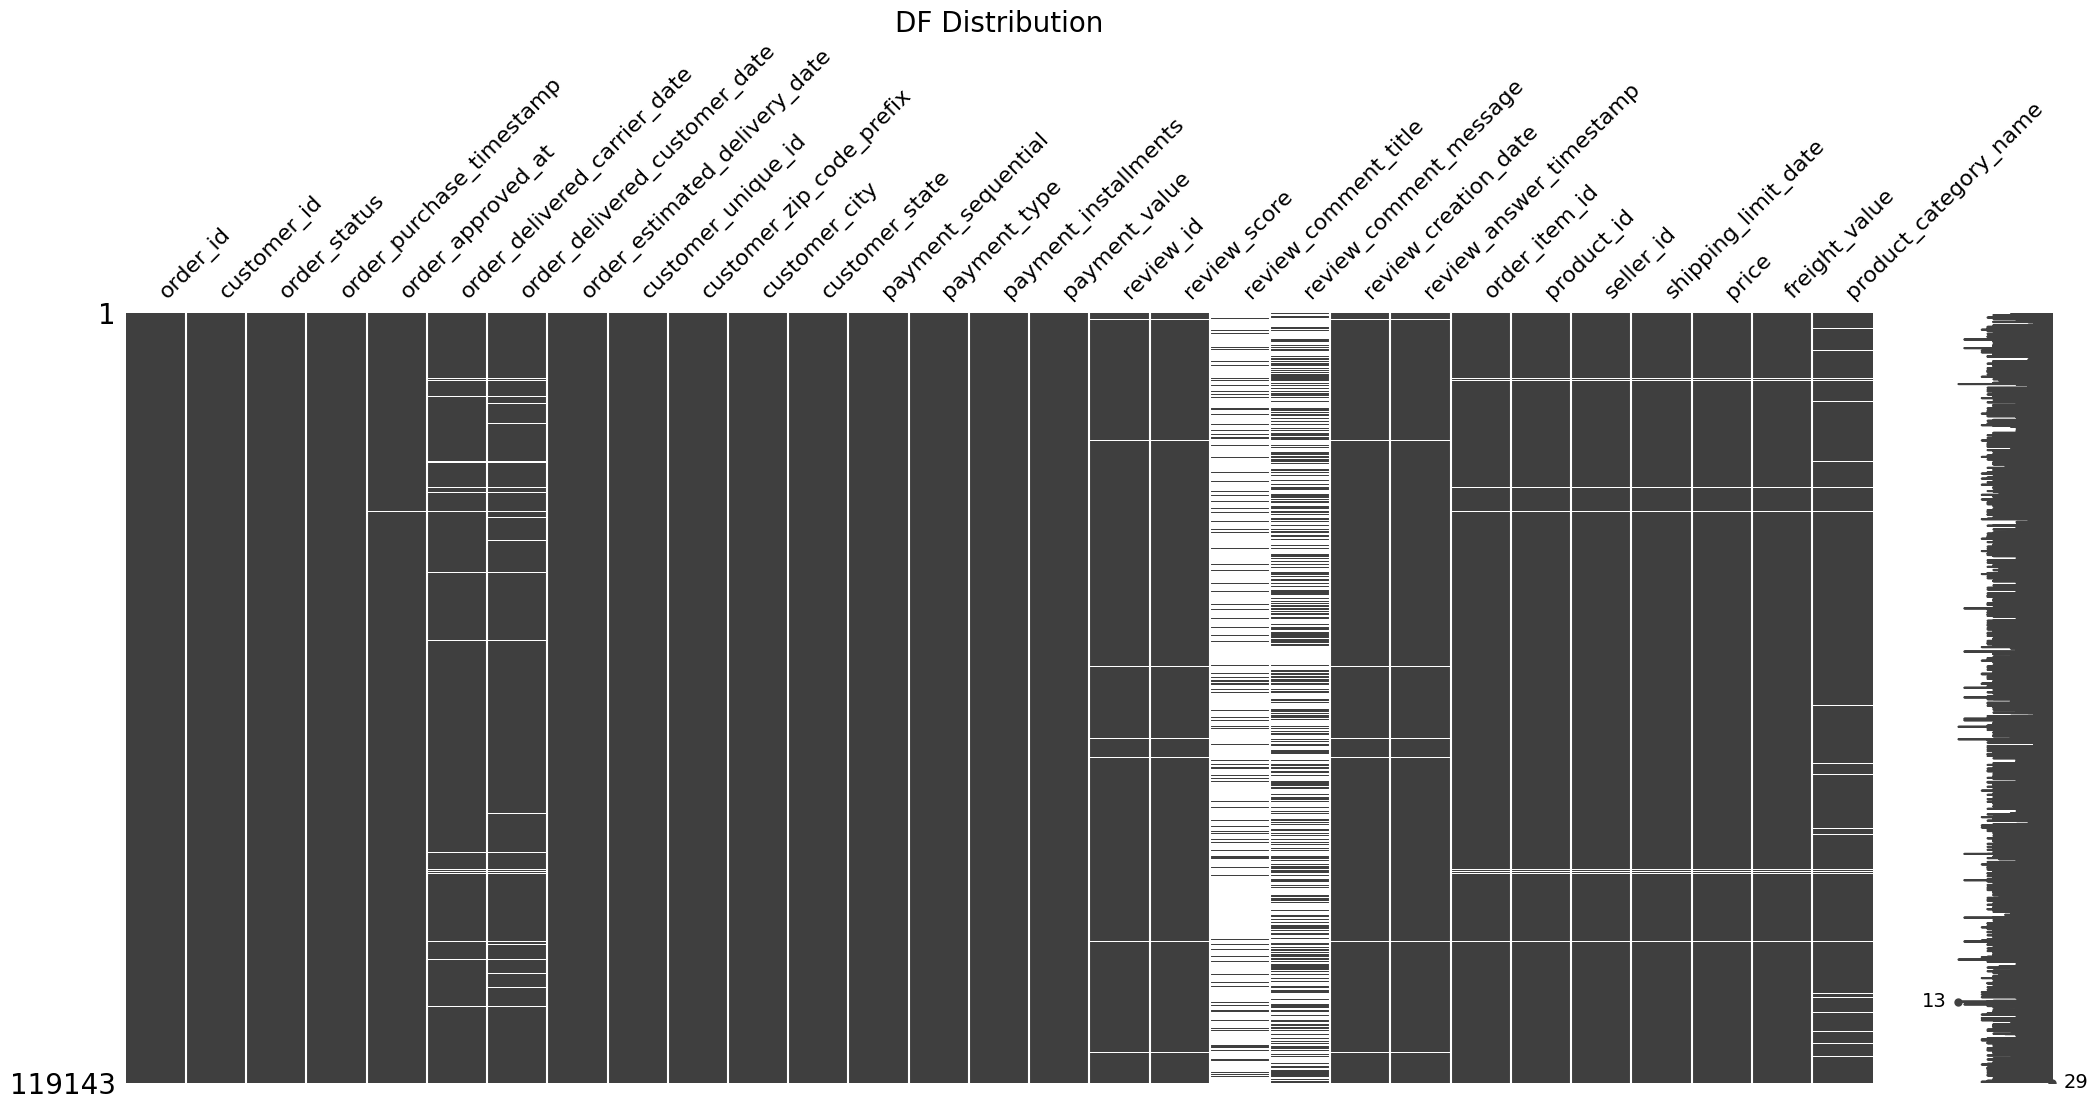

In [ ]:
msno.matrix(df)
plt.title('DF Distribution',fontdict={'fontsize':20})
plt.show()

##### **3.2.5 Fixing Anomalies/ Missing Values**

1. "Delivered" order status with null delivered carrier date and null delivered customer date is considered as anomalies, so we will drop them.

In [ ]:
df[(df['order_delivered_carrier_date'].isnull()) &
    (df['order_delivered_customer_date'].isnull()) &
    (df['order_status'] == 'delivered')]

order_id                       customer_id  \
110904  2d858f451373b04fb5c984a1cc2defaf  e08caf668d499a6d643dafd7c5cc498a   

       order_status order_purchase_timestamp   order_approved_at  \
110904    delivered      2017-05-25 23:22:43 2017-05-25 23:30:16   

       order_delivered_carrier_date order_delivered_customer_date  \
110904                          NaT                           NaT   

       order_estimated_delivery_date                customer_unique_id  \
110904                    2017-06-23  d77cf4be2654aa70ef150f8bfec076a6   

        customer_zip_code_prefix  ... review_comment_message  \
110904                     91330  ...                    NaN   

       review_creation_date  review_answer_timestamp order_item_id  \
110904           2017-06-25      2017-06-27 01:49:04           1.0   

                              product_id                         seller_id  \
110904  30b5b5635a79548a48d04162d971848f  f9bbdd976532d50b7816d285a22bd01e   

       shipping_limit_date  price freight_value product_category_name  
110904 2017-06-04 23:30:16  179.0          15.0        sports_leisure  

[1 rows x 29 columns]

In [ ]:
# Drop the row
df = df.drop(df[(df['order_delivered_carrier_date'].isnull()) &
                (df['order_delivered_customer_date'].isnull()) &
                (df['order_status'] == 'delivered')].index)

2. "Delivered" order status with null delivered customer date is considered as anomalies, so we will try to input them with estimated delivery date.

In [ ]:
# Find the data
df[(df['order_delivered_customer_date'].isnull()) & (df['order_status']=='delivered')]

order_id                       customer_id  \
3582    2d1e2d5bf4dc7227b3bfebb81328c15f  ec05a6d8558c6455f0cbbd8a420ad34f   
24665   f5dd62b788049ad9fc0526e3ad11a097  5e89028e024b381dc84a13a3570decb4   
52543   2ebdfc4f15f23b91474edf87475f108e  29f0540231702fda0cfdee0a310f11aa   
94802   e69f75a717d64fc5ecdfae42b2e8e086  cfda40ca8dd0a5d486a9635b611b398a   
99103   0d3268bad9b086af767785e3f0fc0133  4f1d63d35fb7c8999853b2699f5c7649   
116933  ab7c89dc1bf4a1ead9d6ec1ec8968a84  dd1b84a7286eb4524d52af4256c0ba24   
117395  20edc82cf5400ce95e1afacc25798b31  28c37425f1127d887d7337f284080a0f   

       order_status order_purchase_timestamp   order_approved_at  \
3582      delivered      2017-11-28 17:44:07 2017-11-28 17:56:40   
24665     delivered      2018-06-20 06:58:43 2018-06-20 07:19:05   
52543     delivered      2018-07-01 17:05:11 2018-07-01 17:15:12   
94802     delivered      2018-07-01 22:05:55 2018-07-01 22:15:14   
99103     delivered      2018-07-01 21:14:02 2018-07-01 21:29:54   
116933    delivered      2018-06-08 12:09:39 2018-06-08 12:36:39   
117395    delivered      2018-06-27 16:09:12 2018-06-27 16:29:30   

       order_delivered_carrier_date order_delivered_customer_date  \
3582            2017-11-30 18:12:23                           NaT   
24665           2018-06-25 08:05:00                           NaT   
52543           2018-07-03 13:57:00                           NaT   
94802           2018-07-03 13:57:00                           NaT   
99103           2018-07-03 09:28:00                           NaT   
116933          2018-06-12 14:10:00                           NaT   
117395          2018-07-03 19:26:00                           NaT   

       order_estimated_delivery_date                customer_unique_id  \
3582                      2017-12-18  13467e882eb3a701826435ee4424f2bd   
24665                     2018-07-16  2f17c5b324ad603491521b279a9ff4de   
52543                     2018-07-30  1bd06a0c0df8b23dacfd3725d2dc0bb9   
94802                     2018-07-30  3bc508d482a402715be4d5cf4020cc81   
99103                     2018-07-24  ebf7e0d43a78c81991a4c59c145c75db   
116933                    2018-06-26  cce5e8188bf42ffb3bb5b18ff58f5965   
117395                    2018-07-19  175378436e2978be55b8f4316bce4811   

        customer_zip_code_prefix  ...  \
3582                       18520  ...   
24665                      18255  ...   
52543                      12445  ...   
94802                      13170  ...   
99103                      13560  ...   
116933                      7261  ...   
117395                      9431  ...   

                                   review_comment_message  \
3582                                Chegou rápido tudo ok   
24665                            Produto novo, muito bom.   
52543                                                 NaN   
94802                                                 NaN   
99103   O produto chegou muito antes do prazo previsto...   
116933  Comprei um produto de uma marca e recebi outro...   
117395                                             Adorei   

       review_creation_date  review_answer_timestamp order_item_id  \
3582             2017-12-19      2017-12-19 04:15:39           1.0   
24665            2018-06-29      2018-06-29 16:26:37           1.0   
52543            2018-07-11      2018-07-11 19:27:46           1.0   
94802            2018-07-07      2018-07-10 11:38:13           1.0   
99103            2018-07-06      2018-07-07 18:48:09           1.0   
116933           2018-06-16      2018-06-16 13:55:00           1.0   
117395           2018-07-06      2018-07-06 20:30:17           1.0   

                              product_id                         seller_id  \
3582    a50acd33ba7a8da8e9db65094fa990a4  8581055ce74af1daba164fdbd55a40de   
24665   2167c8f6252667c0eb9edd51520706a1  0bb738e4d789e63e2267697c42d35a2d   
52543   e7d5464b94c9a5963f7c686fc80145ad  58f1a6197ed863543e0136bdedb3fce2   
94802   e7d5464b94c9a5963

In [ ]:
# Fill the null 'order_delivered_customer_date' with 'order_estimated_delivery_date', but only if 'order_status' is 'delivered'

df.loc[(df['order_status'] == 'delivered') & (df['order_delivered_customer_date'].isnull()),
       'order_delivered_customer_date'] = df['order_estimated_delivery_date']

3. Fill the null in 'product_category_name' with unknown.

In [ ]:
# Find where 'product_category_name' is null
df[df['product_category_name'].isnull()]

order_id                       customer_id  \
8       136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
129     bfe42c22ecbf90bc9f35cf591270b6a7  803ac05904124294f8767894d6da532b   
221     58ac1947c1a9067b9f416cba6d844a3f  ee8e1d37f563ecc11cc4dcb4dfd794c2   
274     e22b71f6e4a481445ec4527cb4c405f7  1faf89c8f142db3fca6cf314c51a37b6   
316     a094215e786240fcfefb83d18036a1cd  86acfb656743da0c113d176832c9d535   
...                                  ...                               ...   
118914  aaab15da689073f8f9aa978a390a69d1  df20748206e4b865b2f14a5eabbfcf34   
118946  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
119039  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
119040  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
119112  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

       order_status order_purchase_timestamp   order_approved_at  \
8          invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
129       delivered      2018-01-27 22:04:34 2018-01-27 22:16:18   
221       delivered      2017-09-13 09:18:50 2017-09-13 13:45:43   
274       delivered      2017-04-22 13:48:18 2017-04-22 14:01:13   
316       delivered      2018-02-08 18:56:45 2018-02-08 19:32:18   
...             ...                      ...                 ...   
118914  unavailable      2018-01-16 14:27:59 2018-01-17 03:37:34   
118946     canceled      2018-08-31 16:13:44                 NaT   
119039     canceled      2018-09-06 18:45:47                 NaT   
119040  unavailable      2017-08-23 16:28:04 2017-08-28 15:44:47   
119112  unavailable      2017-10-10 10:50:03 2017-10-14 18:35:57   

       order_delivered_carrier_date order_delivered_customer_date  \
8                               NaT                           NaT   
129             2018-02-03 03:56:00           2018-02-09 20:16:40   
221             2017-09-14 21:20:03           2017-09-21 21:16:17   
274             2017-04-24 19:08:53           2017-05-02 15:45:27   
316             2018-02-09 21:41:54           2018-02-19 13:28:50   
...                             ...                           ...   
118914                          NaT                           NaT   
118946                          NaT                           NaT   
119039                          NaT                           NaT   
119040                          NaT                           NaT   
119112                          NaT                           NaT   

       order_estimated_delivery_date                customer_unique_id  \
8                         2017-05-09  36edbb3fb164b1f16485364b6fb04c73   
129                       2018-02-26  34c58672601f2c6d29db7efd1f6bf958   
221                       2017-09-25  5cbf29b2dcf212a6a5d864b887238c72   
274                       2017-05-11  1268b060098ed3f22c2e7c34cc72a1a8   
316                       2018-02-22  f5cb81f98962f7504bef1e75579b6dff   
...                              ...                               ...   
118914                    2018-02-06  a33e0969408919ba06779f497ead93ec   
118946                    2018-10-01  e90598185d2427a35e32ef241a5c04aa   
119039                    2018-09-27  d05c44a138277ad325d915c6b7ccbcdf   
119040                    2017-09-15  e72a90a2b29fe1a8795b284aaaa3246f   
119112                    2017-10-23  393d95c05b04db26ac084374094b3a52   

        customer_zip_code_prefix  ...  \
8                          98900  ...   
129                        38650  ...   
221                         4842  ...   
274                        38240  ...   
316                        13474  ...   
...                          ...  ...   
118914                      7025  ...   
118946                     11075  ...   
119039                      5344  ...   
119040                     22723  ...   
119112                     18040  ...   

                                   review_comment_message  \
8     

In [ ]:
# Fill the null in 'product_category_name' with unknown.
df['product_category_name'] = df['product_category_name'].fillna('unknown')

##### **3.2.6 Handling Missing Values**

In [ ]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2085
order_delivered_customer_date      3413
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105153
review_comment_message            68897
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name                 0
dtype: int64

If we see from the df, there are some columns that came from same dataset: <br>
- 'order_approved_at', 'order_delivered_carrier_date',
'order_delivered_customer_date' from **Orders Dataset**.
- 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value' from **Order Payments Dataset**.
- 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp' from **Order Reviews Dataset**.
- 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value' from **Order Items Dataset**.

For columns that came from Order Reviews Dataset we will acknowledges the presence of null values in it. Since the null values in the review fields suggests that not all customers chose to leave feedback, and its natural. For other columns we will handle and check it one by one.

1. Columns from Orders Dataset

In [ ]:
df[df['order_approved_at'].isnull()].head()

order_id                       customer_id  \
1362  00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
2142  ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
2232  df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2429  8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2586  7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   

     order_status order_purchase_timestamp order_approved_at  \
1362     canceled      2018-08-28 15:26:39               NaT   
2142     canceled      2018-09-20 13:54:16               NaT   
2232     canceled      2017-03-04 12:14:30               NaT   
2429     canceled      2018-08-29 16:27:49               NaT   
2586     canceled      2017-05-01 16:12:39               NaT   

     order_delivered_carrier_date order_delivered_customer_date  \
1362                          NaT                           NaT   
2142                          NaT                           NaT   
2232                          NaT                           NaT   
2429                          NaT                           NaT   
2586                          NaT                           NaT   

     order_estimated_delivery_date                customer_unique_id  \
1362                    2018-09-12  4fa4365000c7090fcb8cad5713c6d3db   
2142                    2018-10-17  08642cd329066fe11ec63293f714f2f8   
2232                    2017-04-10  c219f4ac1bc7f1aea33e6ab8885831e8   
2429                    2018-09-13  a8dd81392e5eee5d979c629a76abec2a   
2586                    2017-05-30  29dc4aeff866d6a940c471a3ea4faef0   

      customer_zip_code_prefix  ...  \
1362                      1151  ...   
2142                     33030  ...   
2232                     68742  ...   
2429                     13059  ...   
2586                      5752  ...   

                                 review_comment_message review_creation_date  \
1362  Comprei dois fones de ouvido com valor de R$ 5...           2018-08-28   
2142  O produto veio com defeito ele não liga não fu...           2018-07-28   
2232                                          Razoável            2017-04-12   
2429                                                NaN           2018-08-26   
2586                                                NaN           2017-06-01   

      review_answer_timestamp order_item_id  product_id  seller_id  \
1362      2018-08-28 18:25:55           NaN         NaN        NaN   
2142      2018-07-30 11:06:16           NaN         NaN        NaN   
2232      2017-04-12 14:18:26           NaN         NaN        NaN   
2429      2018-08-26 20:21:38           NaN         NaN        NaN   
2586      2017-06-01 08:21:44           NaN         NaN        NaN   

     shipping_limit_date  price freight_value product_category_name  
1362                 NaT    NaN           NaN               unknown  
2142                 NaT    NaN           NaN               unknown  
2232                 NaT    NaN           NaN               unknown  
2429                 NaT    NaN           NaN               unknown  
2586                 NaT    NaN           NaN               unknown  

[5 rows x 29 columns]

In [ ]:
df[df['order_approved_at'].isnull()]['order_status'].unique()

array(['canceled', 'delivered', 'created'], dtype=object)

For null values in 'order_approved_at' we can conclude that:
- It is normal if order status is created or cancelled and 'order_approved_at' is null.
- It is acceptable if order status is delivered but 'order_approved_at' is null, seller might be forgot to approve but approved by the system anyways.

In [ ]:
df[df['order_delivered_carrier_date'].isnull()].head()

order_id                       customer_id  \
8    136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
125  0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
155  15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
319  8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
385  d3c8851a6651eeff2f73b0e011ac45d0  957f8e082185574de25992dc659ebbc0   

    order_status order_purchase_timestamp   order_approved_at  \
8       invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
125     invoiced      2018-08-03 17:44:42 2018-08-07 06:15:14   
155   processing      2017-09-03 14:22:03 2017-09-03 14:30:09   
319  unavailable      2017-11-16 15:09:28 2017-11-16 15:26:57   
385   processing      2016-10-05 22:44:13 2016-10-06 15:51:05   

    order_delivered_carrier_date order_delivered_customer_date  \
8                            NaT                           NaT   
125                          NaT                           NaT   
155                          NaT                           NaT   
319                          NaT                           NaT   
385                          NaT                           NaT   

    order_estimated_delivery_date                customer_unique_id  \
8                      2017-05-09  36edbb3fb164b1f16485364b6fb04c73   
125                    2018-08-21  c7f8d7b1fffc946d7069574f74c39f4e   
155                    2017-10-03  9f269af9c49244f6ba4a46985a3cfc2e   
319                    2017-12-05  41fc647b8c6bd979b1b6364b60471b50   
385                    2016-12-09  07d5b1f9bdd053347f0213187b343ac9   

     customer_zip_code_prefix  ...  \
8                       98900  ...   
125                     88140  ...   
155                      3436  ...   
319                     89288  ...   
385                      3531  ...   

                                review_comment_message review_creation_date  \
8                 fiquei triste por n ter me atendido.           2017-05-13   
125  Gostei do produto, porem fiquei preocupada não...           2018-08-25   
155                                                NaN           2017-10-05   
319  Anunciam um produto que não tem em estoque e a...           2017-12-07   
385                                                NaN           2016-12-11   

     review_answer_timestamp order_item_id                        product_id  \
8        2017-05-13 20:25:42           1.0  a1804276d9941ac0733cfd409f5206eb   
125      2018-08-29 10:48:52           1.0  1522589c64efd46731d3522568e5bc83   
155      2017-10-05 12:55:11           1.0  61d52f4882421048afd530db53d6f230   
319      2017-12-11 10:37:57           NaN                               NaN   
385      2016-12-13 10:17:32           1.0  ca17b18b38db6e0d2c33d362322f2a06   

                            seller_id shipping_limit_date  price  \
8    dc8798cbf453b7e0f98745e396cc5616 2017-04-19 13:25:17   49.9   
125  28405831a29823802aa22c084cfd0649 2018-08-13 06:15:14   35.0   
155  fa74b2f3287d296e9fbd2cc80f2d1cf1 2017-09-20 14:30:09  125.9   
319                               NaN                 NaT    NaN   
385  4be2e7f96b4fd749d52dff41f80e39dd 2016-10-21 16:24:45  267.0   

    freight_value product_category_name  
8           16.05               unknown  
125         15.35    christmas_supplies  
155         12.38             perfumery  
319           NaN               unknown  
385         32.84       books_technical  

[5 rows x 29 columns]

In [ ]:
df[df['order_delivered_carrier_date'].isnull()]['order_status'].unique()

array(['invoiced', 'processing', 'unavailable', 'canceled', 'created',
       'approved', 'delivered'], dtype=object)

In [ ]:
df[(df['order_delivered_carrier_date'].notnull()) & (df['order_delivered_customer_date'].isnull())].head()

order_id                       customer_id  \
51   ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
192  6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
200  36530871a5e80138db53bcfd8a104d90  4dafe3c841d2d6cc8a8b6d25b35704b9   
278  4d630f57194f5aba1a3d12ce23e71cd9  6d491c9fe2f04f6e2af6ec033cd8907c   
355  3b4ad687e7e5190db827e1ae5a8989dd  1a87b8517b7d31373b50396eb15cb445   

    order_status order_purchase_timestamp   order_approved_at  \
51       shipped      2018-06-04 16:44:48 2018-06-05 04:31:18   
192      shipped      2018-01-10 11:33:07 2018-01-11 02:32:30   
200      shipped      2017-05-09 11:48:37 2017-05-11 11:45:14   
278      shipped      2017-11-17 19:53:21 2017-11-18 19:50:31   
355      shipped      2018-06-28 12:52:15 2018-06-28 13:11:09   

    order_delivered_carrier_date order_delivered_customer_date  \
51           2018-06-05 14:32:00                           NaT   
192          2018-01-11 19:39:23                           NaT   
200          2017-05-11 13:21:47                           NaT   
278          2017-11-22 17:28:34                           NaT   
355          2018-07-04 15:20:00                           NaT   

    order_estimated_delivery_date                customer_unique_id  \
51                     2018-06-28  08fb46d35bb3ab4037202c23592d1259   
192                    2018-02-07  528b011eb7fab3d59c336cc7248eed3a   
200                    2017-06-08  10669e874b7ddaab97d6d539578576d7   
278                    2017-12-13  7eb6b25c03556dfd2a2ee982f42074c2   
355                    2018-08-03  1c13e7a690e418f5a133c8a219b5a124   

     customer_zip_code_prefix  ...  \
51                      13215  ...   
192                     38600  ...   
200                     54762  ...   
278                     91450  ...   
355                     20910  ...   

                                review_comment_message review_creation_date  \
51                                                 NaN           2018-07-01   
192                                                NaN                  NaT   
200                                                NaN           2017-06-14   
278                                                NaN           2017-12-16   
355  Comprei um produto e não entregaram. \r\nPedi ...           2018-08-05   

     review_answer_timestamp order_item_id                        product_id  \
51       2018-07-11 20:41:18           1.0  c50ca07e9e4db9ea5011f06802c0aea0   
192                      NaT           1.0  ee0c1cf2fbeae95205b4aa506f1469f0   
200      2017-06-16 12:13:47           1.0  ba4bfbf74dbe7ab37e263b9326da0523   
278      2017-12-20 09:34:26           1.0  62bf07cdb14270c48cf42ca0312986aa   
355      2018-08-05 13:47:00           1.0  6026308f343d15d492324e7e35ba5685   

                            seller_id shipping_limit_date   price  \
51   e9779976487b77c6d4ac45f75ec7afe9 2018-06-13 04:30:33   14.49   
192  cc419e0650a3c5ba77189a1882b7556a 2018-01-18 02:32:30   53.99   
200  f8db351d8c4c4c22c6835c19a46f01b0 2017-05-17 11:45:14   36.90   
278  04e38a233f726ef161074ab1c9b0399a 2017-11-23 19:50:31  199.90   
355  966cb4760537b1404caedd472cc610a5 2018-07-04 13:11:09  844.00   

    freight_value product_category_name  
51           7.87         health_beauty  
192         15.13             perfumery  
200         26.89        sports_leisure  
278         40.33        sports_leisure  
355         21.01         watches_gifts  

[5 rows x 29 columns]

In [ ]:
df[(df['order_delivered_carrier_date'].notnull()) &
                   (df['order_delivered_customer_date'].isnull())]['order_status'].unique()

array(['shipped', 'canceled'], dtype=object)

In [ ]:
df[(df['order_delivered_carrier_date'].isnull()) & (df['order_delivered_customer_date'].notnull())].head()

order_id                       customer_id  \
87578  2aa91108853cecb43c84a5dc5b277475  afeb16c7f46396c0ed54acb45ccaaa40   

      order_status order_purchase_timestamp   order_approved_at  \
87578    delivered      2017-09-29 08:52:58 2017-09-29 09:07:16   

      order_delivered_carrier_date order_delivered_customer_date  \
87578                          NaT           2017-11-20 19:44:47   

      order_estimated_delivery_date                customer_unique_id  \
87578                    2017-11-14  a2ac81ecc3704410ae240e74d4f0af40   

       customer_zip_code_prefix  ... review_comment_message  \
87578                     13334  ...                    NaN   

      review_creation_date  review_answer_timestamp order_item_id  \
87578           2017-10-17      2017-10-17 10:56:02           1.0   

                             product_id                         seller_id  \
87578  44c2baf621113fa7ac95fa06b4afbc68  3f2af2670e104d1bcb54022274daeac5   

      shipping_limit_date  price freight_value product_category_name  
87578 2017-10-18 10:07:16  179.0         14.98       furniture_decor  

[1 rows x 29 columns]

For null values in both 'order_delivered_carrier_date' and 'order_delivered_customer_date' we can conclude that:
- It is normal if 'order_delivered_carrier_date' is null, for non-delivered orders, since the orders not delivered yet.
- It is acceptable for delivered orders, since it considered as a courier not inputing or confirming that the order has been delivered.

2. Columns from Order Payments Dataset

From the checking previously, we can see that these columns has 3 rows on df that have missing values in it. We will drop those rows.

In [ ]:
df = df.dropna(subset=['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'])

3. Columns from Order Items Dataset

We will check if the 833 null values from 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value' are on the same rows

In [ ]:
nulls = df[(df['order_item_id'].isnull()) & (df['product_id'].isnull()) & (df['seller_id'].isnull()) & (df['shipping_limit_date'].isnull()) & (df['price'].isnull()) & (df['freight_value'].isnull())]
nulls

order_id                       customer_id  \
319     8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
702     c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
828     37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
887     d57e15fb07fd180f06ab3926b39edcd2  470b93b3f1cde85550fc74cd3a476c78   
1362    00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
...                                  ...                               ...   
118914  aaab15da689073f8f9aa978a390a69d1  df20748206e4b865b2f14a5eabbfcf34   
118946  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
119039  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
119040  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
119112  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

       order_status order_purchase_timestamp   order_approved_at  \
319     unavailable      2017-11-16 15:09:28 2017-11-16 15:26:57   
702     unavailable      2018-01-31 11:31:37 2018-01-31 14:23:50   
828     unavailable      2017-08-14 17:38:02 2017-08-17 00:15:18   
887     unavailable      2018-01-08 19:39:03 2018-01-09 07:26:08   
1362       canceled      2018-08-28 15:26:39                 NaT   
...             ...                      ...                 ...   
118914  unavailable      2018-01-16 14:27:59 2018-01-17 03:37:34   
118946     canceled      2018-08-31 16:13:44                 NaT   
119039     canceled      2018-09-06 18:45:47                 NaT   
119040  unavailable      2017-08-23 16:28:04 2017-08-28 15:44:47   
119112  unavailable      2017-10-10 10:50:03 2017-10-14 18:35:57   

       order_delivered_carrier_date order_delivered_customer_date  \
319                             NaT                           NaT   
702                             NaT                           NaT   
828                             NaT                           NaT   
887                             NaT                           NaT   
1362                            NaT                           NaT   
...                             ...                           ...   
118914                          NaT                           NaT   
118946                          NaT                           NaT   
119039                          NaT                           NaT   
119040                          NaT                           NaT   
119112                          NaT                           NaT   

       order_estimated_delivery_date                customer_unique_id  \
319                       2017-12-05  41fc647b8c6bd979b1b6364b60471b50   
702                       2018-02-16  0e634b16e4c585acbd7b2e8276ce6677   
828                       2017-09-05  596ed6d7a35890b3fbac54ec01f69685   
887                       2018-02-06  2349bbb558908e0955e98d47dacb7adb   
1362                      2018-09-12  4fa4365000c7090fcb8cad5713c6d3db   
...                              ...                               ...   
118914                    2018-02-06  a33e0969408919ba06779f497ead93ec   
118946                    2018-10-01  e90598185d2427a35e32ef241a5c04aa   
119039                    2018-09-27  d05c44a138277ad325d915c6b7ccbcdf   
119040                    2017-09-15  e72a90a2b29fe1a8795b284aaaa3246f   
119112                    2017-10-23  393d95c05b04db26ac084374094b3a52   

        customer_zip_code_prefix  ...  \
319                        89288  ...   
702                        11701  ...   
828                         2318  ...   
887                        48607  ...   
1362                        1151  ...   
...                          ...  ...   
118914                      7025  ...   
118946                     11075  ...   
119039                      5344  ...   
119040                     22723  ...   
119112                     18040  ...   

                                   review_comment_message  \
319   

Yes, they are in the same rows. And if we see the proportion its only 0.006%, so we will drop them.

In [ ]:
len(nulls) / len(df)

0.006991833068936285

In [ ]:
df = df.drop(df[(df['order_item_id'].isnull()) & (df['product_id'].isnull()) & (df['seller_id'].isnull()) & (df['shipping_limit_date'].isnull()) & (df['price'].isnull()) & (df['freight_value'].isnull())].index)

Check the missing values again.

In [ ]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1253
order_delivered_customer_date      2580
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                           978
review_score                        978
review_comment_title             104414
review_comment_message            68627
review_creation_date                978
review_answer_timestamp             978
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
dtype: int64

##### **3.2.7 Check Duplicates**

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, payment_sequential, payment_type, payment_installments, payment_value, review_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, product_category_name]
Index: []

[0 rows x 29 columns]

##### **3.2.8 Fixing Typos**

In [ ]:
product_category_unique_values = df['product_category_name'].unique().tolist()
product_category_unique_values.sort()
product_category_unique_values

['agro_industry_and_commerce',
 'air_conditioning',
 'art',
 'arts_and_craftmanship',
 'audio',
 'auto',
 'baby',
 'bed_bath_table',
 'books_general_interest',
 'books_imported',
 'books_technical',
 'cds_dvds_musicals',
 'christmas_supplies',
 'cine_photo',
 'computers',
 'computers_accessories',
 'consoles_games',
 'construction_tools_construction',
 'construction_tools_lights',
 'construction_tools_safety',
 'cool_stuff',
 'costruction_tools_garden',
 'costruction_tools_tools',
 'diapers_and_hygiene',
 'drinks',
 'dvds_blu_ray',
 'electronics',
 'fashio_female_clothing',
 'fashion_bags_accessories',
 'fashion_childrens_clothes',
 'fashion_male_clothing',
 'fashion_shoes',
 'fashion_sport',
 'fashion_underwear_beach',
 'fixed_telephony',
 'flowers',
 'food',
 'food_drink',
 'furniture_bedroom',
 'furniture_decor',
 'furniture_living_room',
 'furniture_mattress_and_upholstery',
 'garden_tools',
 'health_beauty',
 'home_appliances',
 'home_appliances_2',
 'home_comfort_2',
 'home_confo

Found some typos in 'product_category_name':
- costruction_tools_garden
- costruction_tools_tools
- fashio_female_clothing
- home_confort

In [ ]:
# Fixing the typos
typos_fixed = {'costruction_tools_garden':'construction_tools_garden', 'costruction_tools_tools': 'construction_tools_tools', 'home_confort': 'home_comfort', 'fashio_female_clothing': 'fashion_female_clothing'}

df['product_category_name'] = df['product_category_name'].replace(typos_fixed)

<a id="fdf"></a>
### **3.3. Final DF**

In [ ]:
# Check the summary of the final df

pd.set_option('display.max_colwidth', None)

pd.DataFrame({
    'features': df.columns.values,
    'data_type': df.dtypes.values,
    'null': df.isna().mean().values * 100,
    'any_negative': [True if df[i].dtype in [int, float] and (df[i] < 0).any() else False for i in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [
        f"{df[i].min()} to {df[i].max()}" if pd.api.types.is_datetime64_any_dtype(df[i])
        else df[i].unique() for i in df.columns
    ]
})

features       data_type       null  any_negative  \
0                        order_id          object   0.000000         False   
1                     customer_id          object   0.000000         False   
2                    order_status          object   0.000000         False   
3        order_purchase_timestamp  datetime64[ns]   0.000000         False   
4               order_approved_at  datetime64[ns]   0.012679         False   
5    order_delivered_carrier_date  datetime64[ns]   1.059118         False   
6   order_delivered_customer_date  datetime64[ns]   2.180785         False   
7   order_estimated_delivery_date  datetime64[ns]   0.000000         False   
8              customer_unique_id          object   0.000000         False   
9        customer_zip_code_prefix           int64   0.000000         False   
10                  customer_city          object   0.000000         False   
11                 customer_state          object   0.000000         False   
12             payment_sequential         float64   0.000000         False   
13                   payment_type          object   0.000000         False   
14           payment_installments         float64   0.000000         False   
15                  payment_value         float64   0.000000         False   
16                      review_id          object   0.826670         False   
17                   review_score         float64   0.826670         False   
18           review_comment_title          object  88.257569         False   
19         review_comment_message          object  58.008047         False   
20           review_creation_date  datetime64[ns]   0.826670         False   
21        review_answer_timestamp  datetime64[ns]   0.826670         False   
22                  order_item_id         float64   0.000000         False   
23                     product_id          object   0.000000         False   
24                      seller_id          object   0.000000         False   
25            shipping_limit_date  datetime64[ns]   0.000000         False   
26                          price         float64   0.000000         False   
27                  freight_value         float64   0.000000         False   
28          product_category_name          object   0.000000         False   

    n_unique  \
0      98664   
1      98664   
2          7   
3      98110   
4      90172   
5      81016   
6      95669   
7        449   
8      95418   
9      14976   
10      4110   
11        27   
12        29   
13         4   
14        24   
15     28938   
16     97707   
17         5   
18      4497   
19     35691   
20       632   
21     97545   
22        21   
23     32950   
24      3095   
25     93316   
26      5968   
27      6999   
28        74   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

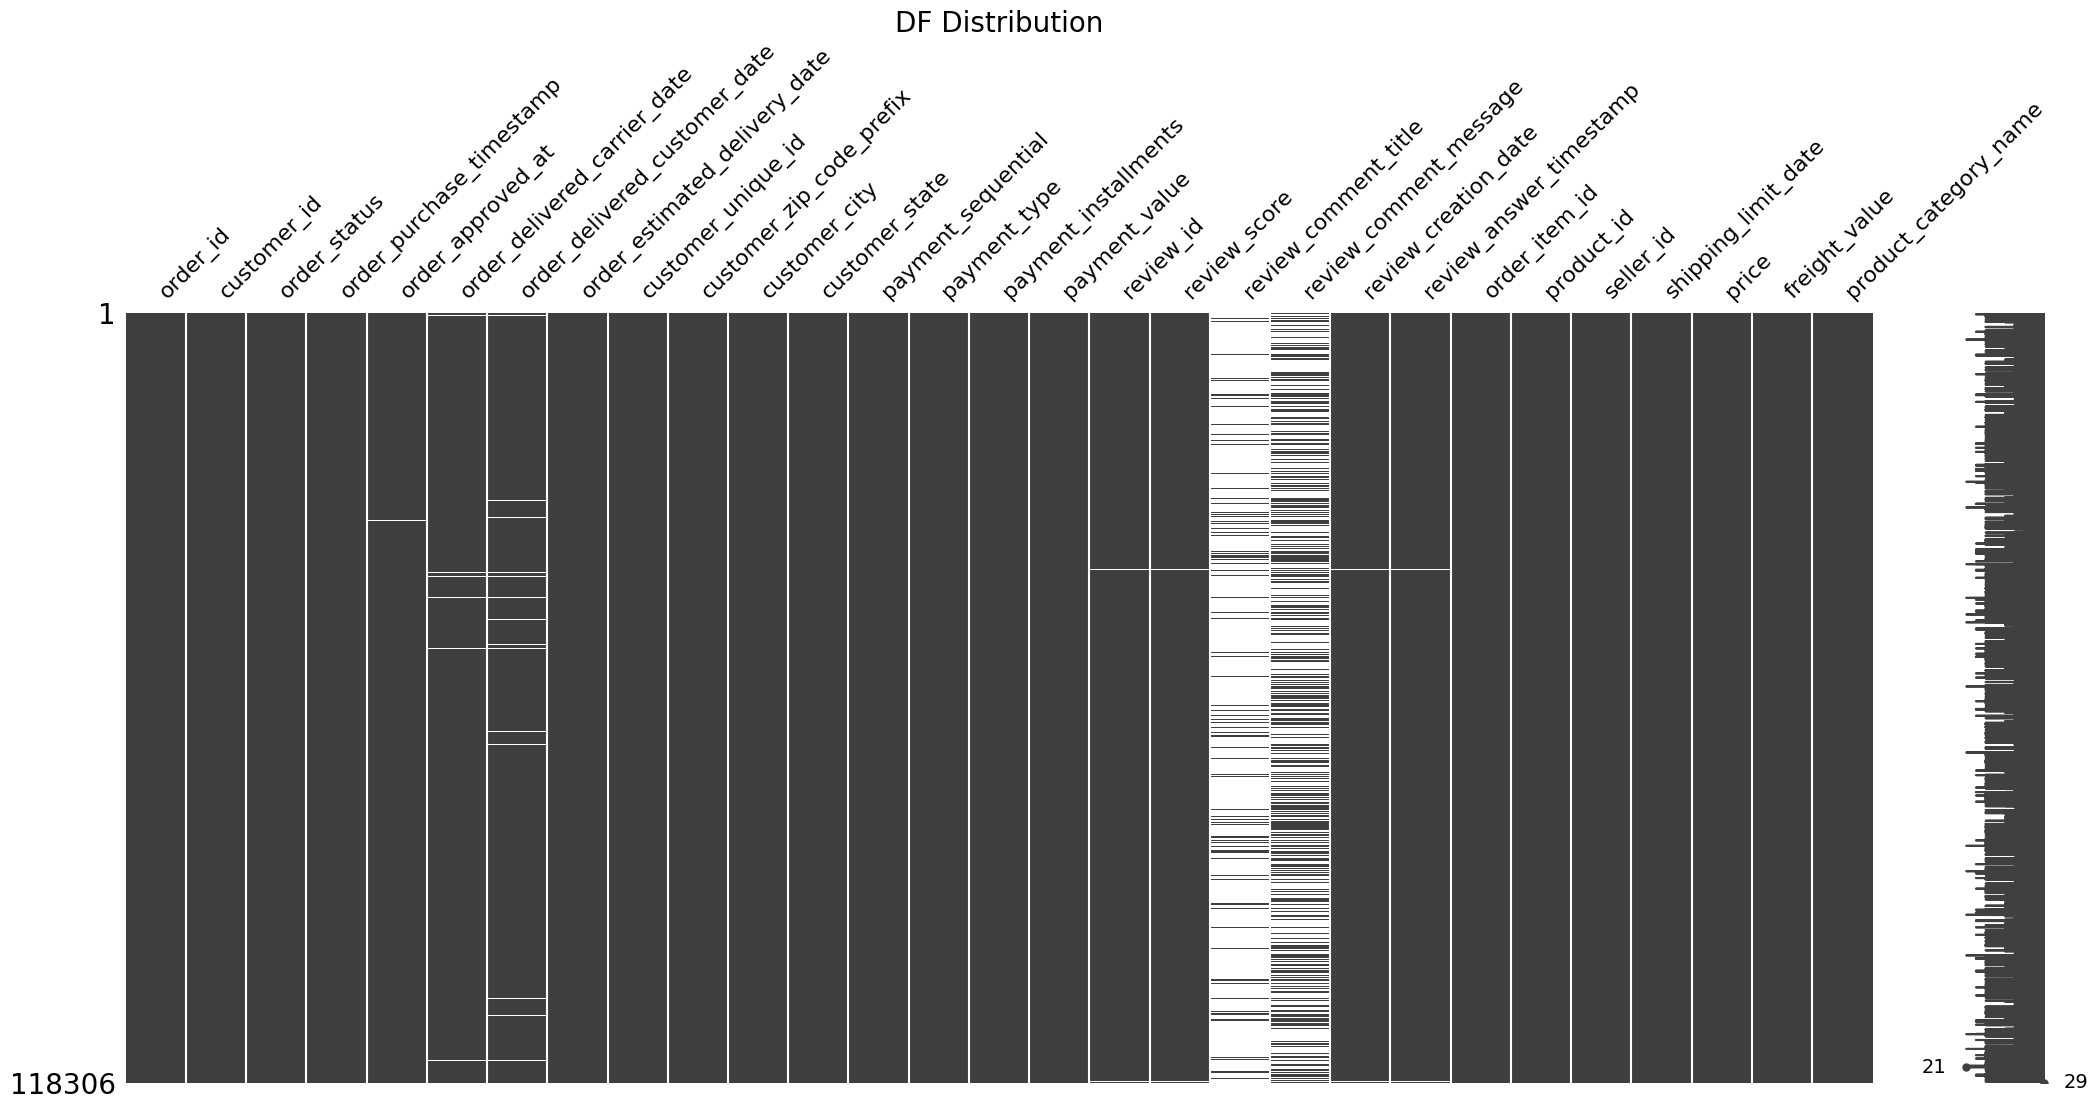

In [ ]:
msno.matrix(df)
plt.title('DF Distribution',fontdict={'fontsize':20})
plt.show()

Summary:
- We have 29 columns and 118306 rows, that will be used in EDA. And for modeling, we will take some of the columns to create a new df, for RFM purposes.
- If we see from the df there is some columns that have missing values, but we will acknowledges them since it is expected and reasonable, based on the checking we did previously.


In [ ]:
# Export the clean DataFrame to a CSV file
df.to_csv('Olist_Clean.csv', index=False)

---
<a id="eda"></a>
## **4. Exploratory Data Analysis (EDA)**

### **4.1. Trend of Sales**

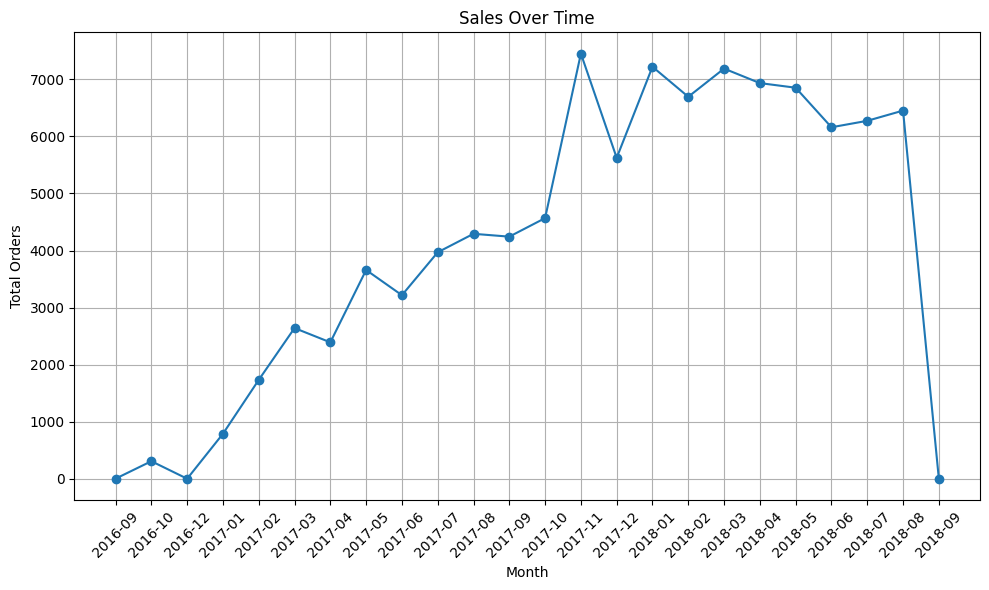

In [ ]:
# Sales Over Time
sales_over_time = df.groupby(df['order_purchase_timestamp'].dt.to_period('M')).agg({
    'order_id': 'nunique'
}).reset_index().rename(columns={'order_id': 'total_orders'})
sales_over_time['order_purchase_timestamp'] = sales_over_time['order_purchase_timestamp'].astype(str)

# Create a line chart for Sales Over Time
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['order_purchase_timestamp'], sales_over_time['total_orders'], marker='o')
plt.title('Sales Over Time')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Orders')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

**Insights:**
1. Overall Growth Trend:

The chart shows a general upward trend in total orders from the start of the period (around September 2016) to around November 2017. This indicates that the business experienced significant growth in order volume over this time frame.

2. Seasonal or Event-Driven Spikes:

There's a noticeable spike in orders around November 2017. This could be attributed to a seasonal event, such as Black Friday or a holiday shopping season, where customers typically make more purchases.
After this peak, the order volume remains relatively high but fluctuates slightly. This could indicate a strong post-event performance where the business retained some of the increased customer activity.

3. Stabilization Period:

From December 2017 to mid-2018, the total orders remain relatively stable, hovering around 4,000 to 6,000 orders per month. This suggests that the business reached a level of consistent order volume during this period.

4. Sharp Decline in September 2018:

There's a sharp and dramatic decline in total orders in September 2018. This drop is quite significant and might indicate an issue regarding the incompleteness in data. And after we checked, it is because we have only 1 row of data in that month, and it is the last date in this dataset. Thus, lack of records in this dataset after September 2018 might needs further investigation on the backend.

In [ ]:
# Analyze the Decline in September 2018
df[df['order_purchase_timestamp'].dt.to_period('M') == '2018-09']

order_id                       customer_id  \
74515  54282e97f61c23b78330c15b154c867d  4b7decb9b58e2569548b8b4c8e20e8d7   

      order_status order_purchase_timestamp   order_approved_at  \
74515      shipped      2018-09-03 09:06:57 2018-09-03 17:40:06   

      order_delivered_carrier_date order_delivered_customer_date  \
74515          2018-09-04 15:25:00                           NaT   

      order_estimated_delivery_date                customer_unique_id  \
74515                    2018-09-06  ff22e30958c13ffe219db7d711e8f564   

       customer_zip_code_prefix  ... review_comment_message  \
74515                      2989  ...             Nao recebi   

      review_creation_date  review_answer_timestamp order_item_id  \
74515           2018-08-31      2018-08-31 09:51:47           1.0   

                             product_id                         seller_id  \
74515  b98992ea80b467987a7fbb88e7f2076a  25be943a321c8938947bdaabca979a90   

      shipping_limit_date  price freight_value  \
74515 2018-09-05 17:30:54  145.0         21.46   

                         product_category_name  
74515  kitchen_dining_laundry_garden_furniture  

[1 rows x 29 columns]

In [ ]:
# It's the last row in our dataset
df['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

Conclusion:
The business demonstrated strong growth from late 2016 to late 2017, followed by a period of stabilization.

<a id="top10cc"></a>
### **4.2. Top 10 Customer Cities**

In [ ]:
customerCity = df.customer_city.value_counts(normalize = True)[:10] * 100
print('The top 10 cities from which customers come are: \n', customerCity)

The top 10 cities from which customers come are: 
 customer_city
sao paulo                15.829290
rio de janeiro            6.982740
belo horizonte            2.767400
brasilia                  2.099640
curitiba                  1.535002
campinas                  1.472453
porto alegre              1.408213
salvador                  1.299173
guarulhos                 1.186753
sao bernardo do campo     0.947543
Name: proportion, dtype: float64


---

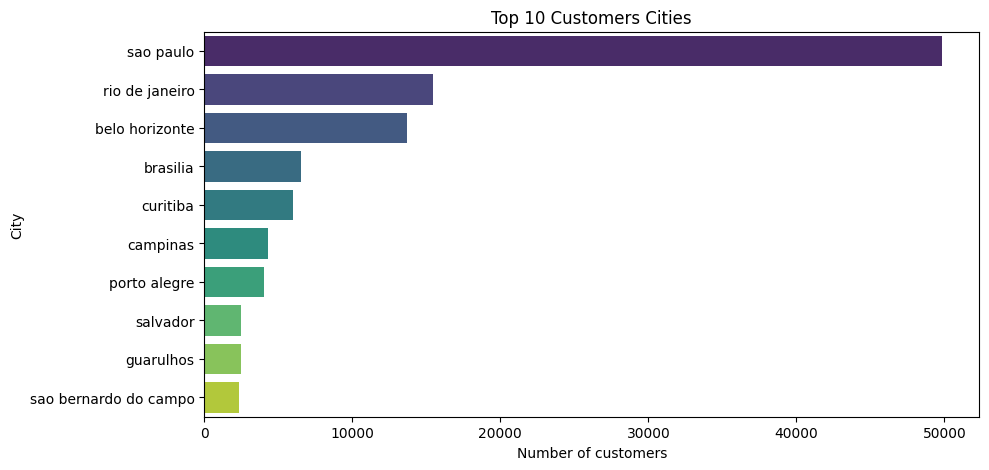

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y = df.customer_city.value_counts().index[:10], x = df.customer_state.value_counts().values[:10], palette='viridis')
plt.xlabel('Number of customers',color='black')
plt.ylabel('City',color='black')
plt.title('Top 10 Customers Cities',color='black')
plt.show()

Observations:
1. The **most common city** for customers is **São Paulo**, representing **15.62% of the total customer base**.
2. **Rio de Janeiro** follows, accounting for **6.92% of customers**.
3. Among the **top 10 cities**, **São Bernardo do Campo** has the smallest customer share, contributing just **0.94%**.

### **4.3. Top Products in Top Customer Cities**

<Figure size 1400x800 with 0 Axes>

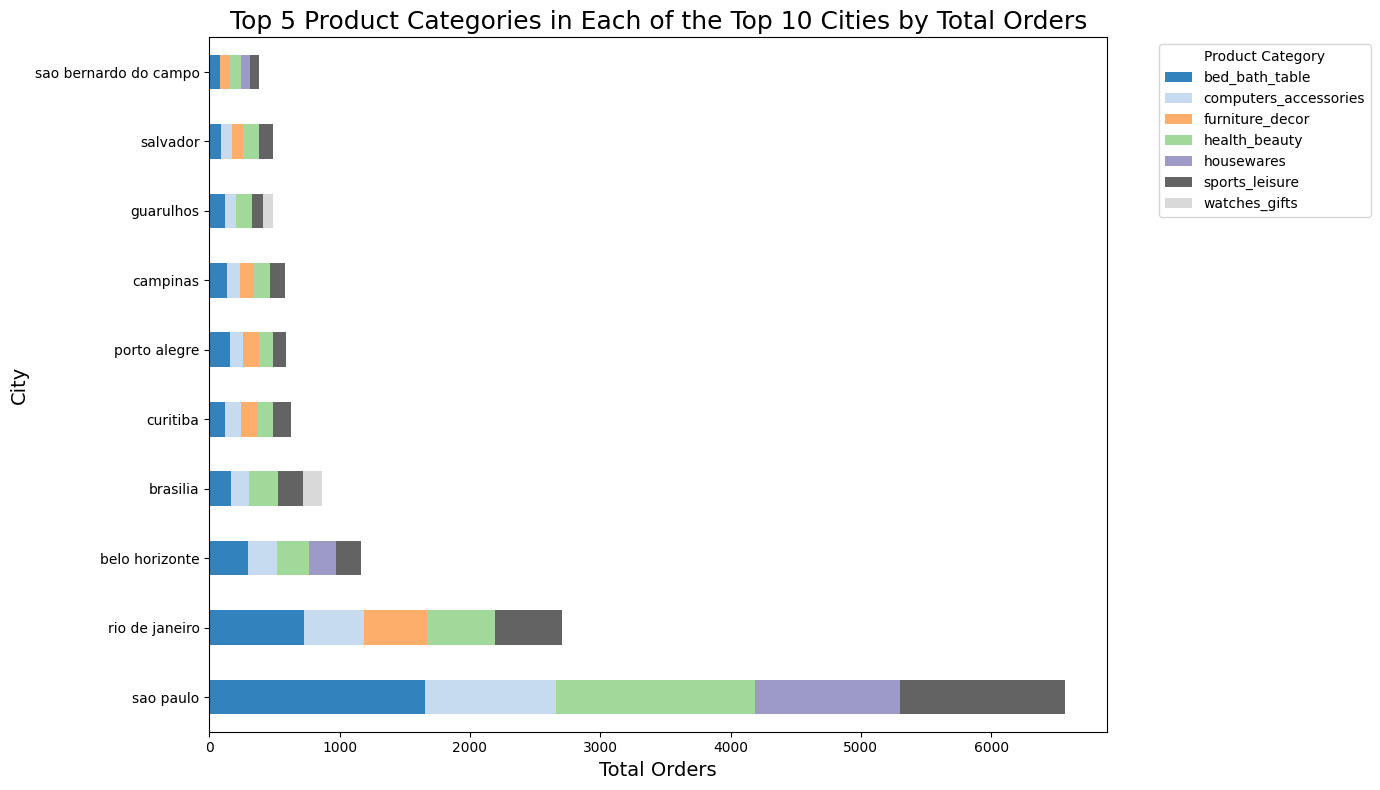

In [ ]:
# Step 1: Identify the Top 10 Cities by total orders
top_10_cities = df.groupby('customer_city')['order_id'].nunique().nlargest(10).index

# Step 2: Filter data for only the top 10 cities
df_top_cities = df[df['customer_city'].isin(top_10_cities)]

# Step 3: For each city, find the top 5 product categories by total orders
top_products_by_city = (
    df_top_cities.groupby(['customer_city', 'product_category_name'])['order_id']
    .nunique()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .reset_index()
)

# Step 4: Pivot the data to get the top product categories as columns
pivot_products = top_products_by_city.pivot_table(index='customer_city', columns='product_category_name', values='order_id', fill_value=0)

# Step 5: Calculate total orders for each city and sort
pivot_products['Total Orders'] = pivot_products.sum(axis=1)
pivot_products = pivot_products.sort_values('Total Orders', ascending=False)
pivot_products = pivot_products.drop(columns='Total Orders')  # Drop the total column after sorting

# Step 6: Plot the horizontal stacked bar chart
plt.figure(figsize=(14, 8))
pivot_products.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.ylabel('City', fontsize=14)
plt.xlabel('Total Orders', fontsize=14)
plt.title('Top 5 Product Categories in Each of the Top 10 Cities by Total Orders', fontsize=18)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

1. Dominance of São Paulo and Rio de Janeiro:

- São Paulo and Rio de Janeiro have the highest total number of orders among the top 10 cities, with São Paulo leading by a significant margin.
- These two cities are major urban centers in Brazil, which likely explains their dominance in total orders.

2. Product Category Distribution in São Paulo:

- In São Paulo, a wide variety of product categories contribute significantly to the total orders, indicating a diverse customer base with varied shopping interests.
- The top categories in São Paulo include bed_bath_table, computers_accessories, health_beauty, and sports_leisure, each contributing a substantial portion of the total orders.

3. Product Category Distribution in Rio de Janeiro:

- Similar to São Paulo, Rio de Janeiro shows diversity in its top product categories, but with a slightly different emphasis.
- bed_bath_table and computers_accessories are also prominent in Rio de Janeiro, but other categories like furniture_decor and health_beauty also have a strong presence.

4. Variation in Smaller Cities:

- In smaller cities like Salvador, Guarulhos, and Campinas, the distribution of orders across product categories is more concentrated, with fewer categories dominating the sales.
- For example, in Salvador, computers_accessories and housewares seem to dominate, whereas in Curitiba, categories like health_beauty and furniture_decor play a significant role.

5. Specialization of Product Categories:

Certain cities show a strong preference for specific product categories. For instance:
- Brasilia: Has a noticeable focus on watches_gifts, which is less dominant in other cities.
- Belo Horizonte: Shows a balanced mix but with a notable presence of housewares.

6. Implications for Marketing and Inventory Management:

- Targeted Marketing: The varied preferences across cities suggest that targeted marketing campaigns tailored to the dominant product categories in each city could be highly effective.
- Inventory Management: For retailers, understanding which product categories are popular in different cities can help optimize inventory distribution to meet local demand efficiently.

7. Overall Trend:

The chart reflects a strong urban demand for diverse product categories, with major cities like São Paulo and Rio de Janeiro leading in overall order volume.
Smaller cities, while having lower total orders, still show a strong preference for specific categories, indicating potential niche markets.

Conclusion:
The chart provides a clear overview of the top product categories by total orders in the top 10 cities. São Paulo and Rio de Janeiro are key markets with diverse product demands, while smaller cities exhibit more concentrated preferences. This information is valuable for businesses looking to optimize their product offerings, marketing strategies, and inventory management to cater to regional differences in customer preferences.

<a id="top10cs"></a>
### **4.4. Top 10 Customer States**

In [ ]:
customerState = df.customer_state.value_counts(normalize=True)[:10] * 100
print('The top 10 cities from which customers come are: \n', customerState)

The top 10 cities from which customers come are: 
 customer_state
SP    42.146637
RJ    13.038223
MG    11.595354
RS     5.525502
PR     5.061451
SC     3.650702
BA     3.438541
DF     2.113164
GO     2.073437
ES     1.987220
Name: proportion, dtype: float64


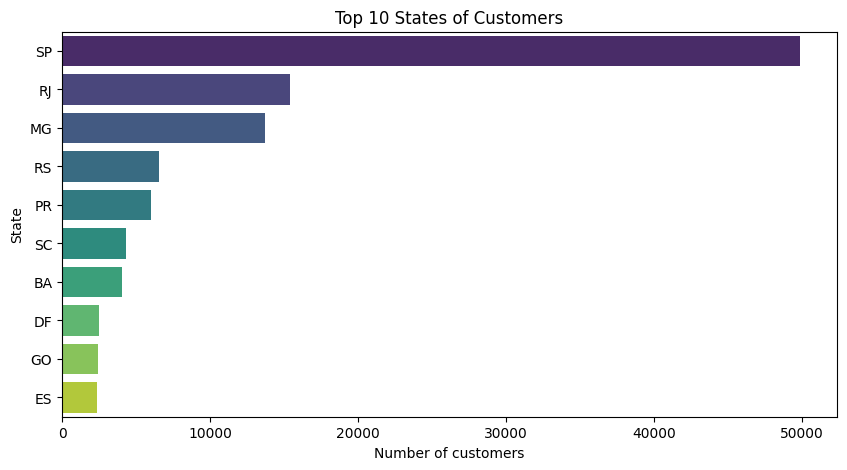

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y = df.customer_state.value_counts().index[:10], x = df.customer_state.value_counts().values[:10], palette='viridis')
plt.xlabel('Number of customers',color='black')
plt.ylabel('State',color='black')
plt.title('Top 10 States of Customers',color='black')
plt.show()

Observations:
1. The **leading state** for customer origin is **São Paulo**, with **41.98%** of customers coming from there.
2. **Rio de Janeiro** follows, contributing **12.92%** of the customer base.


From external research we got the state mapping as written below:

'RJ':'Rio de Janeiro',
         'GO':'Goias',
         'MG':'Minas Gerais',
         'PR':'Parana',
         'BA':'Bahia',
         'PE':'Pernambuco',
         'RS':'Rio Grande do Sul',
         'SP':'Sao Paulo',
         'CE':'Ceara',
         'ES':'Espirito Santo',
         'SC':'Santa Catarina',
         'AL':'Alagoas',
         'RN':'Rio Grande do Norte',
         'PA':'Para',
         'DF':'Distrito Federal',
         'MA':'Maranhao',
         'RO':'Rondonia',
         'MS':'Mato Grosso do Sul',
         'MT':'Mato Grosso',
         'PB':'Paraiba',
         'AP':'Amapa',
         'AM':'Amazonas',
         'PI':'Piaui',
         'TO':'Tocantins',
         'RR':'Roraima',
         'SE':'Sergipe',
         'AC':'Acre'

<a id="topcom"></a>
### **4.5. Top Comments by the Customers**

In [ ]:
topComments = df.review_comment_title.value_counts()[:10]
print('The top 10 comments by the customer are:',topComments,sep='\n')

The top 10 comments by the customer are:
review_comment_title
Recomendo          494
recomendo          403
Bom                331
super recomendo    310
Excelente          293
Muito bom          279
Ótimo              268
Super recomendo    256
Ótimo              238
Otimo              201
Name: count, dtype: int64


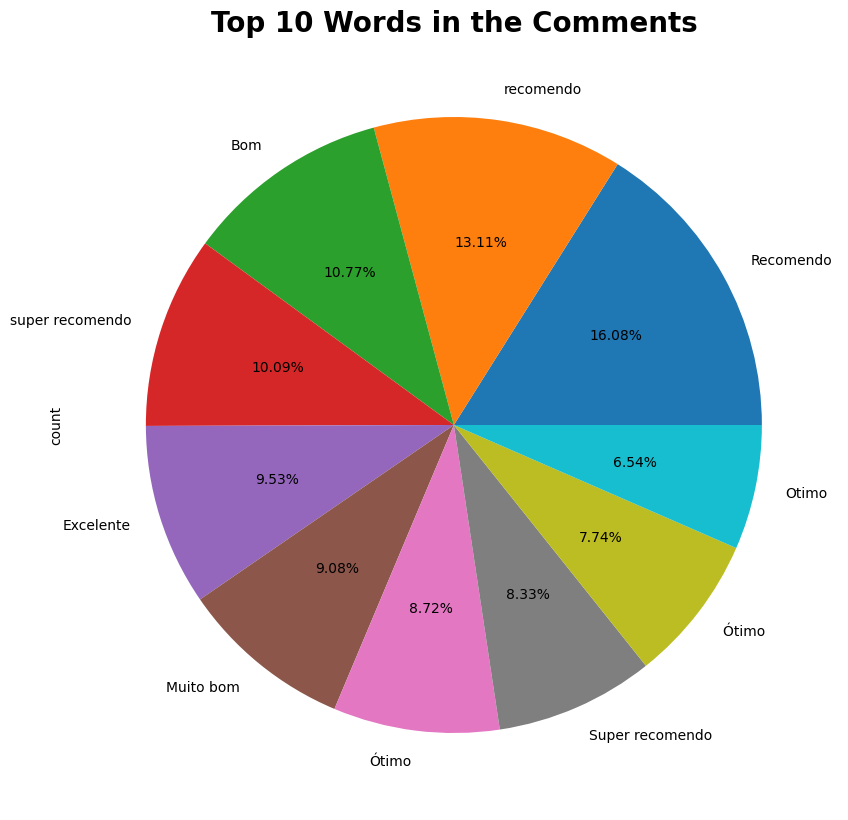

In [ ]:
topComments.plot(kind="pie",autopct="%2.2f%%",figsize=(10, 10))
plt.title('Top 10 Words in the Comments',fontweight='bold',fontsize=20)
plt.show()

# perlu di clean lagi nggak ya?

**Observations:**
1. The most occuring comment is **Recomendo**, **recomendo**, **Bom**, **super recomendo** and **Excelente**.

<a id="distprice"></a>
### **4.6. Cohort Analysis for Retention/ Returning Customers**

In [ ]:
# Create a simplified DataFrame for cohort analysis
df_cohort = df[['customer_unique_id', 'order_purchase_timestamp']].copy()

# Create the cohort_date column (month and year of first purchase)
df_cohort['cohort_date'] = df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

# Create the current_activity_date column (month and year of each purchase)
df_cohort['current_activity_date'] = df_cohort['order_purchase_timestamp'].dt.to_period('M')

# Group by cohort_date and current_activity_date, and calculate the number of unique customers
df_cohort = df_cohort.groupby(['cohort_date', 'current_activity_date'], as_index=False).agg(n_customers=('customer_unique_id', 'nunique'))

# Calculate the period number relative to the cohort
df_cohort['period_number'] = (df_cohort['current_activity_date'] - df_cohort['cohort_date']).apply(lambda x : x.n)

df_cohort.head()

cohort_date current_activity_date  n_customers  period_number
0     2016-09               2016-09            2              0
1     2016-10               2016-10          305              0
2     2016-10               2017-04            1              6
3     2016-10               2017-07            1              9
4     2016-10               2017-09            1             11

In [ ]:
# Pivot the df_cohort DataFrame to create a cohort table
cohort_table = df_cohort.pivot(index='cohort_date', columns='period_number', values='n_customers')

cohort_table

period_number      0     1     2     3     4     5     6     7     8     9   \
cohort_date                                                                   
2016-09           2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-10         305.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   1.0   
2016-12           1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01         754.0   3.0   2.0   1.0   3.0   1.0   3.0   1.0   1.0   NaN   
2017-02        1705.0   4.0   5.0   2.0   7.0   2.0   4.0   3.0   2.0   3.0   
2017-03        2595.0  13.0   9.0  10.0   9.0   4.0   4.0   8.0   9.0   2.0   
2017-04        2339.0  14.0   5.0   4.0   8.0   6.0   8.0   7.0   7.0   4.0   
2017-05        3559.0  17.0  17.0  14.0  11.0  12.0  15.0   5.0   9.0  10.0   
2017-06        3114.0  15.0  11.0  12.0   8.0  12.0  12.0   7.0   4.0   7.0   
2017-07        3843.0  20.0  14.0   9.0  11.0   8.0  12.0   4.0   7.0  10.0   
2017-08        4149.0  28.0  14.0  11.0  15.0  22.0  12.0  11.0   6.0   6.0   
2017-09        4090.0  28.0  22.0  12.0  18.0   9.0   9.0  10.0  12.0   7.0   
2017-10        4412.0  31.0  11.0   4.0  10.0   9.0  10.0  16.0  12.0   9.0   
2017-11        7217.0  40.0  28.0  13.0  14.0  13.0   8.0  14.0  10.0   4.0   
2017-12        5442.0  12.0  15.0  19.0  14.0  11.0   9.0   1.0  12.0   NaN   
2018-01        6983.0  24.0  26.0  20.0  20.0  11.0  12.0  16.0   NaN   NaN   
2018-02        6422.0  25.0  25.0  19.0  17.0  14.0  13.0   NaN   NaN   NaN   
2018-03        6947.0  31.0  22.0  20.0   9.0   8.0   NaN   NaN   NaN   NaN   
2018-04        6709.0  39.0  21.0  16.0   9.0   NaN   NaN   NaN   NaN   NaN   
2018-05        6604.0  35.0  18.0  14.0   NaN   NaN   NaN   NaN   NaN   NaN   
2018-06        5934.0  25.0  16.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-07        6054.0  31.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-08        6238.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

period_number    10    11   12    13   14   15   16   17   19   20  
cohort_date                                                         
2016-09         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2016-10         NaN   1.0  NaN   1.0  NaN  1.0  NaN  1.0  2.0  2.0  
2016-12         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-01         3.0   1.0  5.0   3.0  1.0  1.0  2.0  3.0  1.0  NaN  
2017-02         2.0   5.0  2.0   3.0  2.0  1.0  1.0  4.0  NaN  NaN  
2017-03        10.0   3.0  6.0   3.0  4.0  6.0  2.0  4.0  NaN  NaN  
2017-04         6.0   2.0  2.0   1.0  2.0  2.0  4.0  NaN  NaN  NaN  
2017-05         9.0  12.0  9.0   1.0  7.0  9.0  NaN  NaN  NaN  NaN  
2017-06        10.0  11.0  5.0   4.0  6.0  NaN  NaN  NaN  NaN  NaN  
2017-07         8.0  11.0  5.0  10.0  NaN  NaN  NaN  NaN  NaN  NaN  
2017-08        10.0   8.0  4.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-09        11.0   3.0  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-10         9.0   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-11         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-12         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-01         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-02         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-03         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-04         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-05         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-06         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-07         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-08         NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [ ]:
# Calculate retention rates
cohort_size = cohort_table.iloc[:, 0]  # The size of each cohort in the first month
retention_rate = cohort_table.divide(cohort_size, axis=0)  # Divide each value by the first month's value in that cohort

retention_rate

period_number   0         1         2         3         4         5   \
cohort_date                                                            
2016-09        1.0       NaN       NaN       NaN       NaN       NaN   
2016-10        1.0       NaN       NaN       NaN       NaN       NaN   
2016-12        1.0  1.000000       NaN       NaN       NaN       NaN   
2017-01        1.0  0.003979  0.002653  0.001326  0.003979  0.001326   
2017-02        1.0  0.002346  0.002933  0.001173  0.004106  0.001173   
2017-03        1.0  0.005010  0.003468  0.003854  0.003468  0.001541   
2017-04        1.0  0.005985  0.002138  0.001710  0.003420  0.002565   
2017-05        1.0  0.004777  0.004777  0.003934  0.003091  0.003372   
2017-06        1.0  0.004817  0.003532  0.003854  0.002569  0.003854   
2017-07        1.0  0.005204  0.003643  0.002342  0.002862  0.002082   
2017-08        1.0  0.006749  0.003374  0.002651  0.003615  0.005302   
2017-09        1.0  0.006846  0.005379  0.002934  0.004401  0.002200   
2017-10        1.0  0.007026  0.002493  0.000907  0.002267  0.002040   
2017-11        1.0  0.005542  0.003880  0.001801  0.001940  0.001801   
2017-12        1.0  0.002205  0.002756  0.003491  0.002573  0.002021   
2018-01        1.0  0.003437  0.003723  0.002864  0.002864  0.001575   
2018-02        1.0  0.003893  0.003893  0.002959  0.002647  0.002180   
2018-03        1.0  0.004462  0.003167  0.002879  0.001296  0.001152   
2018-04        1.0  0.005813  0.003130  0.002385  0.001341       NaN   
2018-05        1.0  0.005300  0.002726  0.002120       NaN       NaN   
2018-06        1.0  0.004213  0.002696       NaN       NaN       NaN   
2018-07        1.0  0.005121       NaN       NaN       NaN       NaN   
2018-08        1.0  0.000160       NaN       NaN       NaN       NaN   

period_number        6         7         8         9         10        11  \
cohort_date                                                                 
2016-09             NaN       NaN       NaN       NaN       NaN       NaN   
2016-10        0.003279       NaN       NaN  0.003279       NaN  0.003279   
2016-12             NaN       NaN       NaN       NaN       NaN       NaN   
2017-01        0.003979  0.001326  0.001326       NaN  0.003979  0.001326   
2017-02        0.002346  0.001760  0.001173  0.001760  0.001173  0.002933   
2017-03        0.001541  0.003083  0.003468  0.000771  0.003854  0.001156   
2017-04        0.003420  0.002993  0.002993  0.001710  0.002565  0.000855   
2017-05        0.004215  0.001405  0.002529  0.002810  0.002529  0.003372   
2017-06        0.003854  0.002248  0.001285  0.002248  0.003211  0.003532   
2017-07        0.003123  0.001041  0.001821  0.002602  0.002082  0.002862   
2017-08        0.002892  0.002651  0.001446  0.001446  0.002410  0.001928   
2017-09        0.002200  0.002445  0.002934  0.001711  0.002689  0.000733   
2017-10        0.002267  0.003626  0.002720  0.002040  0.002040       NaN   
2017-11        0.001108  0.001940  0.001386  0.000554       NaN       NaN   
2017-12        0.001654  0.000184  0.002205       NaN       NaN       NaN   
2018-01        0.001718  0.002291       NaN       NaN       NaN       NaN   
2018-02        0.002024       NaN       NaN       NaN       NaN       NaN   
2018-03             NaN       NaN       NaN       NaN       NaN       NaN   
2018-04             NaN       NaN       NaN       NaN       NaN       NaN   
2018-05             NaN       NaN       NaN       NaN       NaN       NaN   
2018-06             NaN       NaN       NaN       NaN       NaN       NaN   
2018-07             NaN       NaN       NaN       NaN       NaN       NaN   
2018-08             NaN       NaN       NaN       NaN       NaN       NaN   

period_number        12        13        14        15        16        17  \
cohort_date                                                                 
2016-09             NaN       NaN       NaN       NaN       NaN       NaN   
2016-10             NaN  0.003279       Na

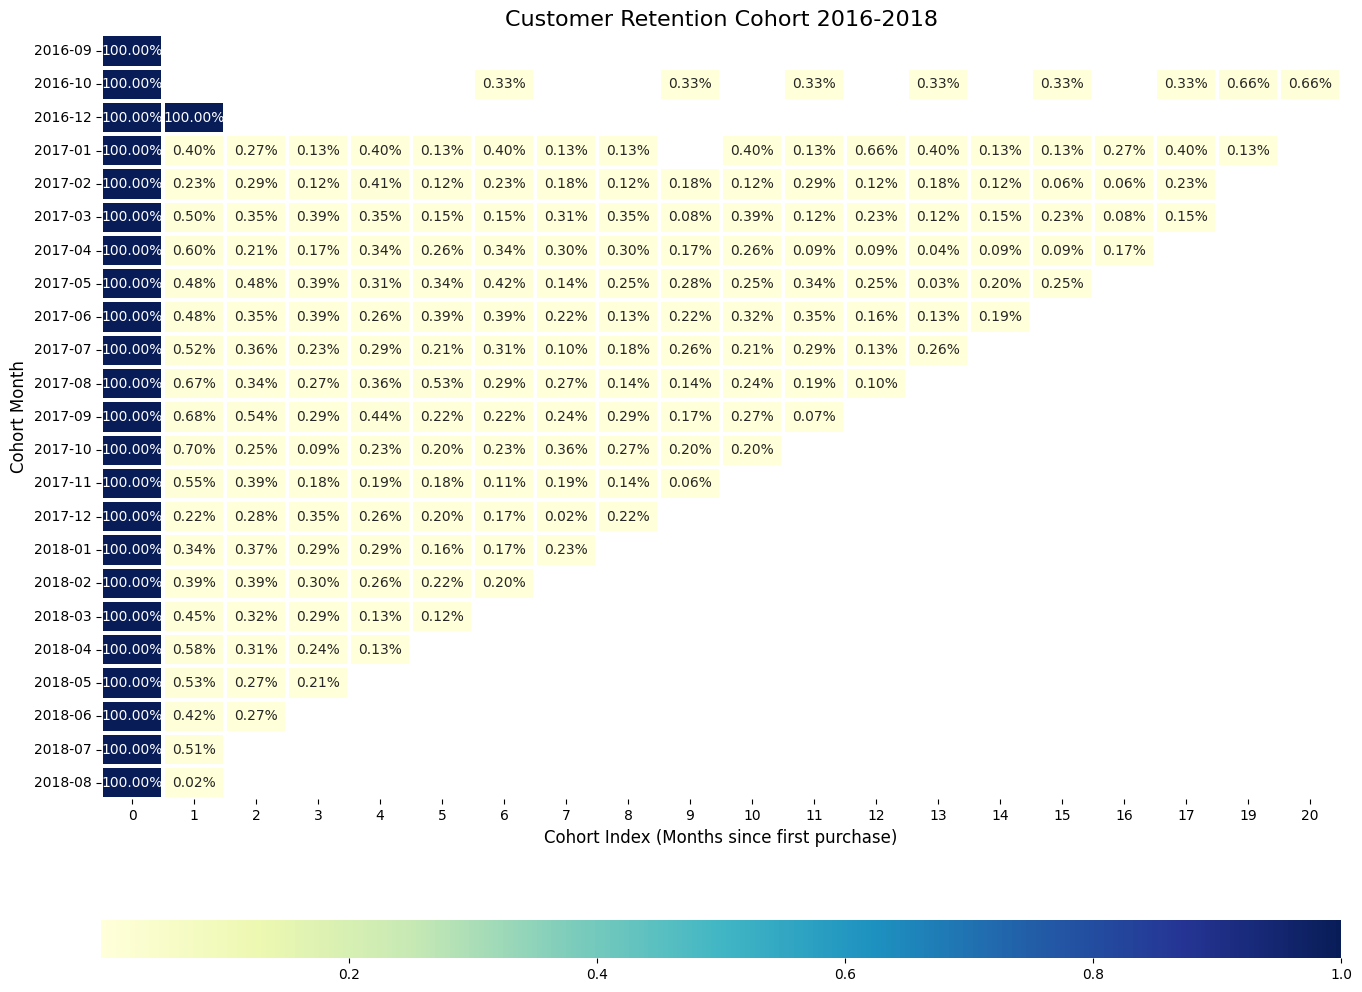

In [ ]:
# Define the grid layout with custom height ratios and spacing
grid = {
    'height_ratios': (20, 1),  # More space for the heatmap, less for the color bar
    'hspace': 0.3  # Increase space between heatmap and color bar
}

# Create the subplots with custom grid specifications
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, figsize=(16, 12), gridspec_kw=grid)

# Create the heatmap on the top axis
sns.heatmap(
    retention_rate,
    annot=True,
    fmt=".2%",
    cmap="YlGnBu",
    linewidths=1.5,  # Add space between cells
    linecolor='white',  # Color of the grid lines
    ax=ax_top,  # Set the top axis for the heatmap
    cbar_ax=ax_bottom,  # Place the color bar in the bottom subplot
    cbar_kws={"orientation": "horizontal", "shrink": 0.75, "pad": 0.3}  # Adjust color bar
)

ax_top.set_title('Customer Retention Cohort 2016-2018', fontsize=16)
ax_top.set_xlabel('Cohort Index (Months since first purchase)', fontsize=12)
ax_top.set_ylabel('Cohort Month', fontsize=12)

plt.show()

**Insights:**
1. Very Low Retention After the First Purchase

The retention rates after the first month drop significantly to around 0.4% - 0.5% for many cohorts. This indicates that only a very small fraction of customers return after their initial purchase.
Such low retention rates suggest that most customers do not engage with the product or service again after their initial interaction. This could be due to a variety of reasons, such as lack of satisfaction with the product, one-time purchase behavior, or insufficient follow-up.

2. Consistency Across Cohorts

Despite the low retention rates, the pattern is relatively consistent across different cohorts, which indicates that the issue may be systemic rather than tied to specific cohorts or time periods.
This consistency suggests that the underlying factors driving low retention are likely common across different customer groups and are not significantly impacted by seasonality or external events.

3. Retention Over Time

The retention rates continue to be low across subsequent months, with very few customers remaining active after the first few months. For many cohorts, the retention rate drops below 0.2% by the 3rd or 4th month.
This indicates that there is very little long-term customer engagement, and the business might rely heavily on acquiring new customers rather than retaining existing ones.

4. Recent Cohorts (2018)

The more recent cohorts show similar retention patterns, with very low retention rates even in the initial months after the first purchase. This suggests that recent strategies or changes in customer acquisition have not significantly improved retention.


### **4.7. Product Categories Ordered by Returning Customers Each Month**

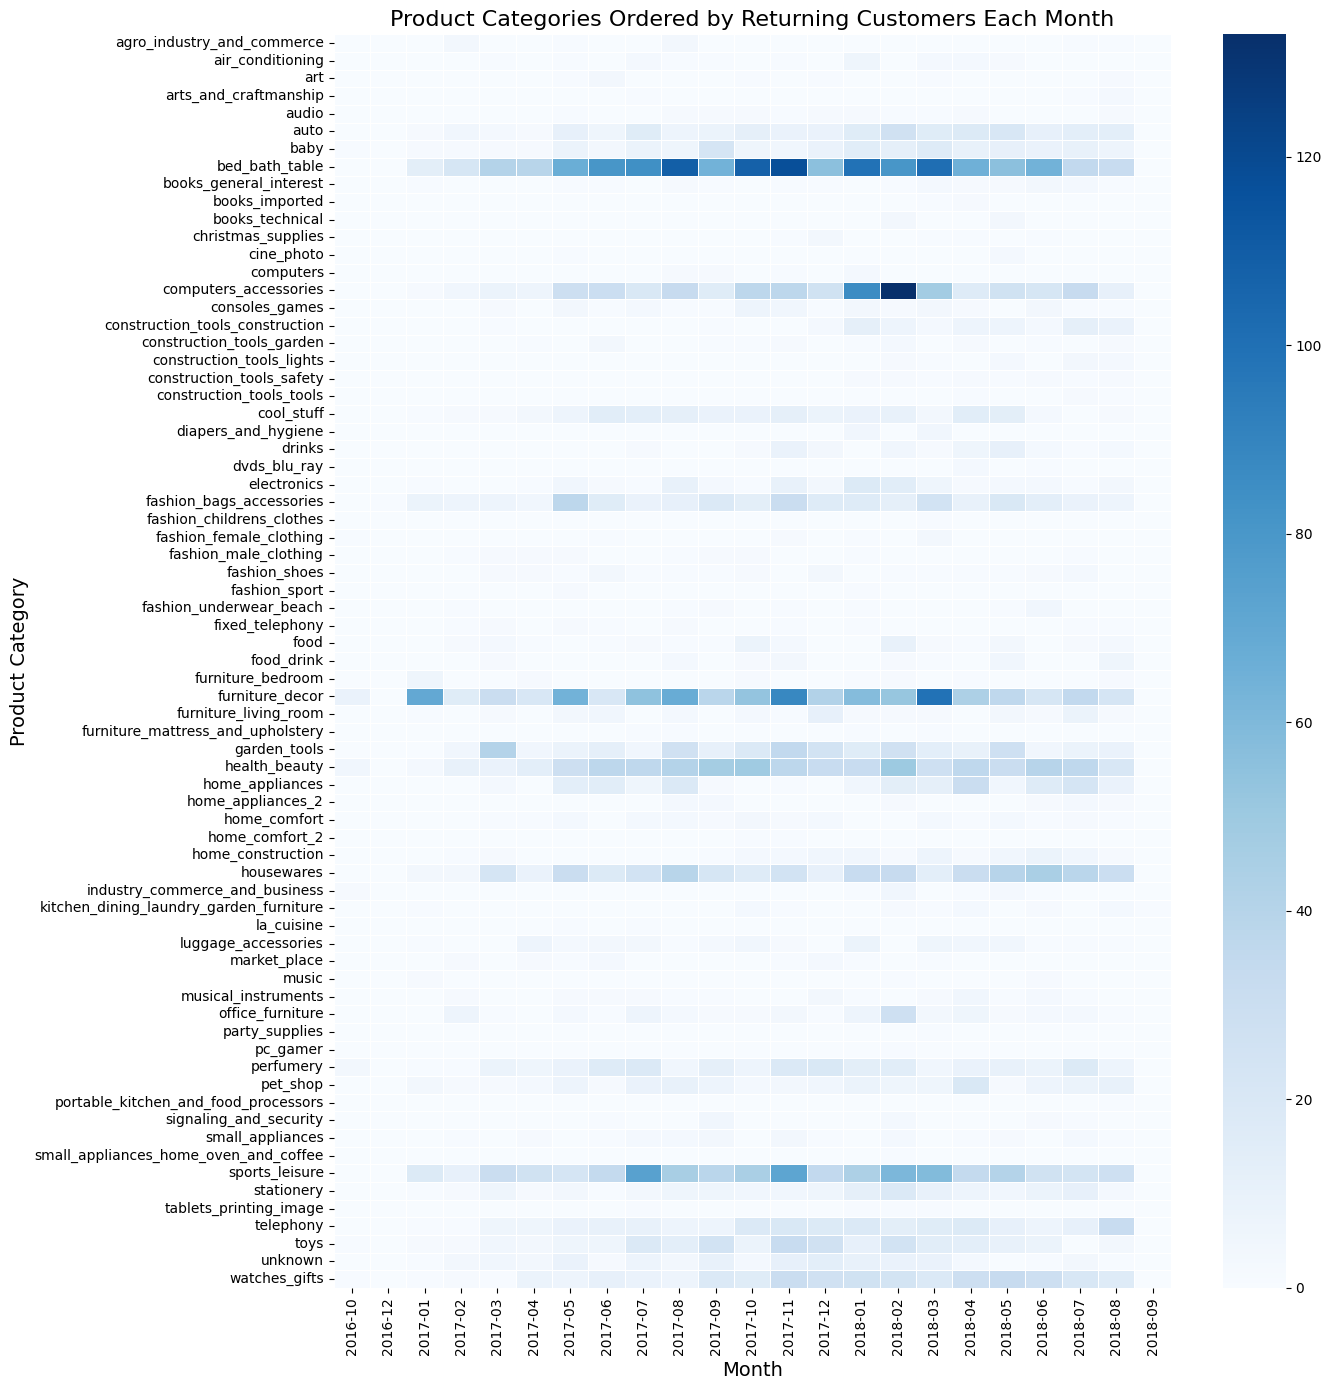

In [ ]:
# Identify returning customers: Find customers who made more than one purchase
returning_customers = df.groupby('customer_unique_id')['order_id'].nunique()
returning_customers = returning_customers[returning_customers > 1].index

# Filter the DataFrame to include only the returning customers
df_returning = df[df['customer_unique_id'].isin(returning_customers)]

# Aggregate their orders by month and product category: Extract month and year from the order timestamp
df_returning['order_month'] = df_returning['order_purchase_timestamp'].dt.to_period('M')

# Group by month and product category to count the number of orders
product_orders_by_month = df_returning.groupby(['order_month', 'product_category_name']).size().unstack().fillna(0)

# Visualize the consistency of product orders
plt.figure(figsize=(14, 14))
sns.heatmap(product_orders_by_month.T, cmap='Blues', linewidths=0.5, linecolor='white')

plt.title('Product Categories Ordered by Returning Customers Each Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.tight_layout()
plt.show()

**Insights:**
1. Consistent Demand for Specific Categories:

- bed_bath_table and computers_accessories are two categories that consistently appear across multiple months. This indicates that these product categories are frequently reordered by returning customers, suggesting they are either essential or high-demand products.
- furniture_decor and health_beauty also show regular activity, though to a lesser extent compared to the top categories. These may be categories where customers return to explore new or seasonal products.

2. Seasonal or Periodic Demand:

- computers_accessories shows a noticeable spike in certain months, possibly indicating seasonal demand or a response to specific promotions or events (e.g., back-to-school season or year-end sales).
- furniture_decor has significant activity in specific months, which might suggest that returning customers are making purchases during particular seasons, such as around holiday periods or home renovation seasons.

3. Low Activity or Niche Categories:

- There are many categories with sparse or low activity, such as toys, stationery, pet_shop, and market_place. These categories may cater to more niche markets or have less frequent purchasing cycles.
- Some categories, like agro_industry_and_commerce and art, show minimal activity, indicating that returning customers are less likely to repeatedly purchase from these categories, or these products are more specialized and bought less frequently.

4. Possible Trends or Patterns:

- The heatmap suggests a consistent engagement from returning customers in specific categories, but also highlights that there isn't a single category dominating every month. Instead, there are several categories with pockets of strong engagement, which could indicate that returning customers are exploring different types of products over time.
- The darker areas in the heatmap, representing higher order volumes, align with common consumer behaviors such as purchasing home goods, electronics, and personal care products regularly.

5. Implications for Strategy:

- Product Focus: Given the strong and consistent demand in categories like bed_bath_table and computers_accessories, retailers could focus on stocking a wide variety of these products to cater to returning customers. Offering bundles or loyalty rewards for these categories might also drive further engagement.
- Marketing and Promotions: Seasonal trends observed in categories like furniture_decor could be leveraged for targeted marketing campaigns. Understanding these trends allows for better timing of promotions to maximize returns.
- Inventory Management: Categories with low but consistent orders, such as health_beauty, should be carefully managed to ensure steady supply without overstocking.

6. Customer Retention Strategies:

- The data suggests that customer retention strategies should focus on these consistently ordered categories, possibly by offering personalized recommendations, discounts, or early access to new arrivals in these categories.
- Categories with low engagement might benefit from targeted re-engagement campaigns or cross-promotion with higher-demand categories to boost visibility and sales.

Conclusion:
The heatmap provides a clear visual representation of the purchasing patterns of returning customers. It highlights key product categories that drive repeat business, indicates potential seasonal or event-driven demand spikes, and suggests areas where strategic interventions could enhance customer engagement and retention.

### **4.8. Payment Methods and Payment Installments Customer Prefer**

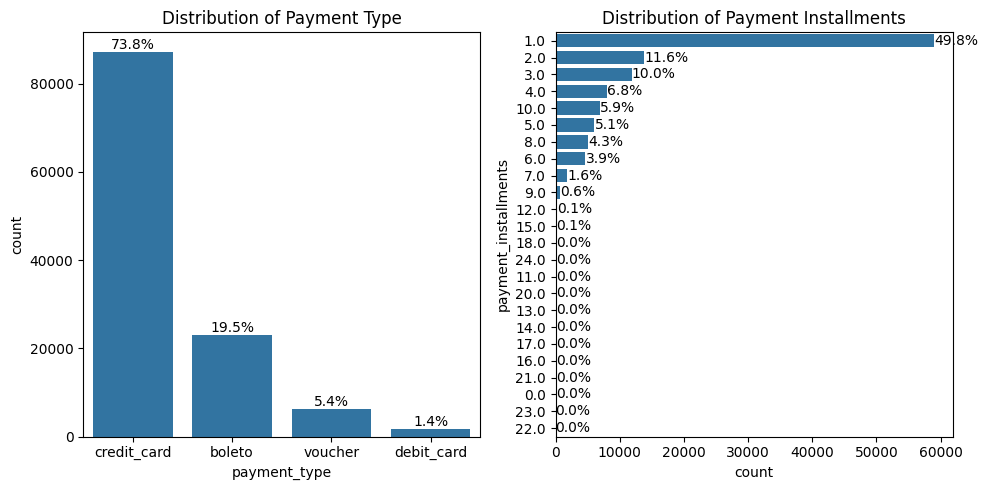

In [ ]:
from matplotlib.gridspec import GridSpec

# Creating subplots with more customization
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, figure=fig)

# Plot for 'payment_type'
ax1 = plt.subplot(gs[0, 0])
sns.countplot(x='payment_type', data=df, order=df['payment_type'].value_counts().index, ax=ax1)
ax1.set_title('Distribution of Payment Type')
total_payment_type = len(df['payment_type'])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_payment_type)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02
    ax1.text(x, y, percentage, ha='center', va='bottom')

# Plot for 'payment_installments'
ax2 = plt.subplot(gs[0, 1])
sns.countplot(y='payment_installments', data=df, order=df['payment_installments'].value_counts().index, ax=ax2)
ax2.set_title('Distribution of Payment Installments')
total_payment_installments = len(df['payment_installments'])
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total_payment_installments)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax2.text(x, y, percentage, ha='left', va='center')

plt.tight_layout()
plt.show()

**Observations:**

1. Dominance of Credit Card Payments:

- 73.8% of the transactions are made using credit cards, indicating that the vast majority of customers prefer this payment method. This suggests that credit card usage is very common among the customer base, possibly due to the convenience and benefits (e.g., reward points, cashback) associated with using credit cards.

2. Usage of Other Payment Methods:

- 19.5% of transactions are made using boleto, a popular payment method in Brazil that involves generating a payment slip for bank transactions. This shows that a significant portion of customers still prefer or rely on traditional payment methods, which might be due to cultural preferences or accessibility issues.
- Voucher and Debit Card are less popular, making up 5.4% and 1.4% of the transactions, respectively. These methods might be used by specific customer segments, such as those without access to credit cards or who prefer direct bank transactions.

3. Single Installment Payments Are Most Common:

- 49.8% of the transactions are completed with a single installment. This suggests that nearly half of the customers prefer to pay off their purchases immediately rather than spreading payments over time.
- This behavior might indicate either a preference for avoiding debt or a tendency to purchase items that are within their immediate financial means.

4. Diverse Use of Installment Plans:

- The remaining 50.2% of transactions involve multiple installments, with a notable spread across 2 to 12 installments.
2 installments (11.6%) and 3 installments (10.0%) are particularly common, indicating that customers are taking advantage of installment plans to manage their cash flow or make larger purchases more affordable.
- The presence of higher installment plans (up to 22 installments) shows that there is a segment of customers who prefer or require extended payment terms, possibly for more expensive items.

5. Market Implications:

- Credit Card Promotions: Since credit cards are the most popular payment method, offering promotions, discounts, or special offers for credit card users could further incentivize purchases and boost sales.
- Installment Plan Offers: Given the diverse use of installment plans, providing flexible and varied installment options could cater to different customer needs, especially for higher-ticket items. Offering interest-free installment plans could also be a strategic move to attract more customers.

6. Financial Accessibility:

- The significant use of boleto and installment payments suggests that financial accessibility and payment flexibility are important to this customer base. Ensuring that these options are prominently available could help capture a wider audience, including those who may not have access to credit or prefer more traditional payment methods.


Conclusion:
The data highlights the importance of offering a range of payment methods and flexible installment plans to meet the diverse needs of customers. While credit cards dominate, a significant portion of customers relies on traditional payment methods like boleto and uses installment plans to manage their purchases. Understanding these preferences can help businesses tailor their payment options and promotional strategies to better serve their customers and potentially increase conversion rates.

---
<a id="modelling"></a>
## **5. Modelling**

### **5.1 Create Data Frame For Clustering**

In [ ]:
# Function to get first mode if there are 2 values
def first_mode(series):
    modes = series.mode()
    return modes.iloc[0]

# Create data frame from customer's shopping behaviour
df_cust = df.groupby('customer_id').agg({
    'order_purchase_timestamp':'max',
    'order_id':'count',
    'payment_value':'sum'}).reset_index()

# Changing order_purchase_timestamp to recency in days
current_date = df_cust['order_purchase_timestamp'].max() + pd.DateOffset(days=1)
df_cust['order_purchase_timestamp'] = (current_date - df_cust['order_purchase_timestamp']).dt.days

In [ ]:
# Rename columns
df_cust.rename(columns={'order_purchase_timestamp':'recency','payment_value':'monetary','order_id':'frequency'},inplace=True)

In [ ]:
df_cust.head()

customer_id  recency  frequency  monetary
0  00012a2ce6f8dcda20d059ce98491703      293          1    114.74
1  000161a058600d5901f007fab4c27140      414          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      552          1    195.42
3  0002414f95344307404f0ace7a26f1d5      383          1    179.35
4  000379cdec625522490c315e70c7a9fb      154          1    107.01

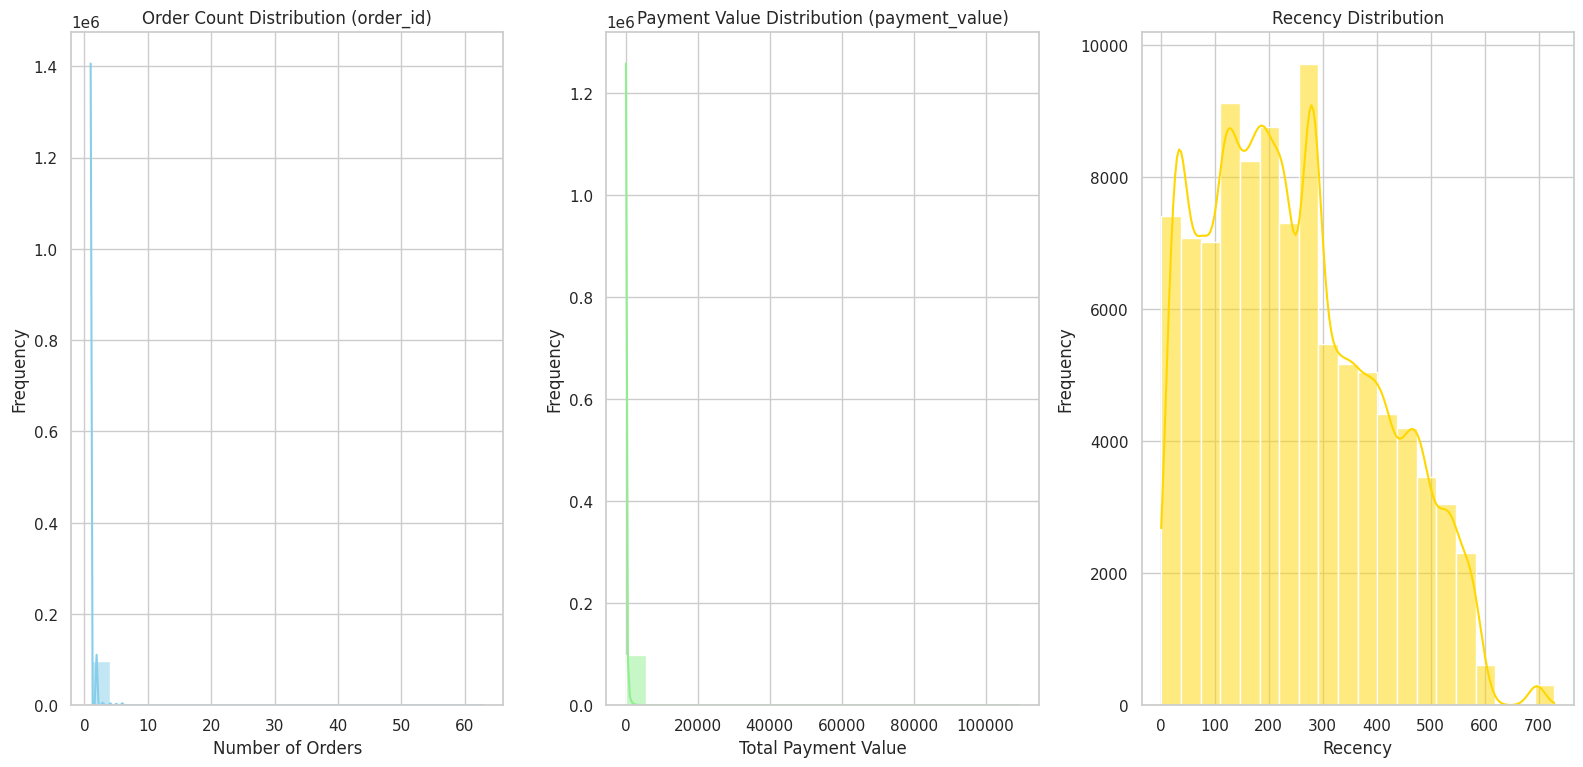

In [ ]:
# Set up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Subplot for 'order_id' distribution
plt.subplot(1, 3, 1)
sns.histplot(df_cust['frequency'], kde=True, bins=20, color='skyblue')
plt.title('Order Count Distribution (order_id)')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')

# Subplot for 'payment_value' distribution
plt.subplot(1, 3, 2)
sns.histplot(df_cust['monetary'], kde=True, bins=20, color='lightgreen')
plt.title('Payment Value Distribution (payment_value)')
plt.xlabel('Total Payment Value')
plt.ylabel('Frequency')

# Subplot for 'recency' distribution
plt.subplot(1, 3, 3)
sns.histplot(df_cust['recency'], kde=True, bins=20, color='gold')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

### **5.2 Data Preprocessing**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# selecting feature
feature = df_cust.drop(columns='customer_id',axis=1)

transformer = ColumnTransformer([
    ('scaler', StandardScaler(),['recency','frequency','monetary'])
])

In [ ]:
transformed_data = transformer.fit_transform(feature)
# Showing scaled RFM feature
pd.DataFrame(transformed_data, columns=['Recency','Frequency','Monetary'])

Recency  Frequency  Monetary
0      0.307666  -0.264675 -0.147700
1      1.096532  -0.264675 -0.223527
2      1.996230  -0.264675 -0.018442
3      0.894426  -0.264675 -0.044188
4     -0.598552  -0.264675 -0.160084
...         ...        ...       ...
98659 -0.487720  -0.264675 -0.184276
98660 -0.572474   2.394309 -0.201178
98661 -0.924530  -0.264675 -0.230384
98662 -1.067960  -0.264675  0.011533
98663  0.783593   1.064817 -0.185734

[98664 rows x 3 columns]

### 5.3 Benchmark Model

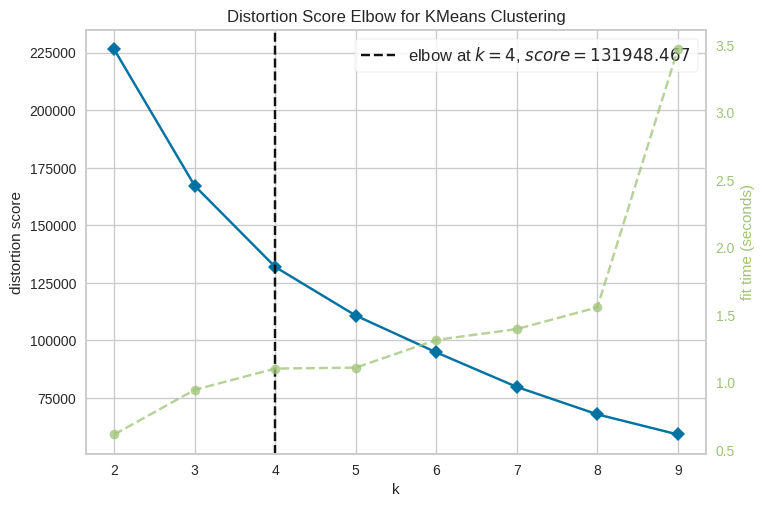

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans, HDBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

# Elbow method to determine k

elbow = KElbowVisualizer(
    KMeans(random_state=0),
    k=(2,10)
)

elbow.fit(transformed_data)
elbow.show()

From the graph above we can see from distortion score the elbow is on k=4

In [ ]:
# Define models
kmeans = KMeans(n_clusters=4, random_state=0)
hdbscan = HDBSCAN()
gmm = GaussianMixture(n_components=3,random_state=0)

models = {
    'KMeans': kmeans,
    'HDBSCAN': hdbscan,
    'GMM': gmm
}

results = {}

# Compare clustering methods
for model_name, model in models.items():
    # Create the full pipeline
    pipeline = Pipeline([
        ('preprocessor', transformer),
        ('clusterer', model)
    ])

# Fit the pipeline
    labels = pipeline.fit_predict(df_cust)  # Ensure df is your preprocessed data

    # Compute metrics
    silhouette = silhouette_score(transformed_data, labels)

    # Store results
    results[model_name] = {
        'Silhouette Score': silhouette,
    }

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} Metrics:")
    print(f"Silhouette Score: {metrics['Silhouette Score']:.4f}")

KMeans Metrics:
Silhouette Score: 0.4795
HDBSCAN Metrics:
Silhouette Score: 0.0079
GMM Metrics:
Silhouette Score: 0.3579


From the shilouette score we can see KMeans have the best score with:
- silhouette score = 0.4795 (closer to 1 indicating well-separated clusters)

### 5.4 Final Model

In [ ]:
# Predict label for customer using KMeans with k=4
kmeans_label = kmeans.fit_predict(transformed_data)
kmeans_label

array([3, 3, 3, ..., 1, 1, 3], dtype=int32)

In [ ]:
# Create new column for the label from kmeans
df_cust['label'] = kmeans_label
df_cust.head()

customer_id  recency  frequency  monetary  label
0  00012a2ce6f8dcda20d059ce98491703      293          1    114.74      3
1  000161a058600d5901f007fab4c27140      414          1     67.41      3
2  0001fd6190edaaf884bcaf3d49edf079      552          1    195.42      3
3  0002414f95344307404f0ace7a26f1d5      383          1    179.35      3
4  000379cdec625522490c315e70c7a9fb      154          1    107.01      1

In [ ]:
# Checking cluster label proportion
df_cust['label'].value_counts(normalize=True)*100

label
1    55.991040
3    40.920701
0     3.066975
2     0.021284
Name: proportion, dtype: float64

In [ ]:
# Statistical summary for RFM feature on each label
df_cust.groupby('label').describe()

recency                                                             \
         count        mean         std    min    25%    50%    75%    max   
label                                                                       
0       3026.0  246.825843  146.413260    6.0  129.0  231.5  345.0  699.0   
1      55243.0  135.584889   73.494929    1.0   72.0  137.0  198.0  266.0   
2         21.0  231.952381  102.668143   50.0  139.0  264.0  321.0  376.0   
3      40374.0  396.557091   95.619704  265.0  311.0  384.0  470.0  729.0   

      frequency             ...             monetary                \
          count       mean  ...   75%   max    count          mean   
label                       ...                                      
0        3026.0   4.104098  ...   4.0  63.0   3026.0   1238.906656   
1       55243.0   1.099379  ...   1.0   3.0  55243.0    167.917036   
2          21.0  10.904762  ...  12.0  22.0     21.0  26669.611905   
3       40374.0   1.112721  ...   1.0   3.0  40374.0    169.203307   

                                                                           
                std       min        25%       50%         75%        max  
label                                                                      
0       1537.676189     19.00    373.695    708.06   1500.4575   12834.50  
1        210.001930      9.59     62.170    108.20    186.3800    3792.59  
2      21077.668785  14196.28  17069.760  18786.90  29099.5200  109312.64  
3        216.679609     10.07     61.750    105.38    187.5675    4042.74  

[4 rows x 24 columns]

In [ ]:
import plotly.express as px

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(df_cust, x='recency', y='frequency', z='monetary', color='label',
                    title='3D Cluster Plot for RFM Features',
                    labels={'recency':'Recency', 'frequency':'Frequency', 'monetary':'Monetary'},
                    color_continuous_scale='Viridis')

# Show the plot (this plot will be interactive)
fig.show()


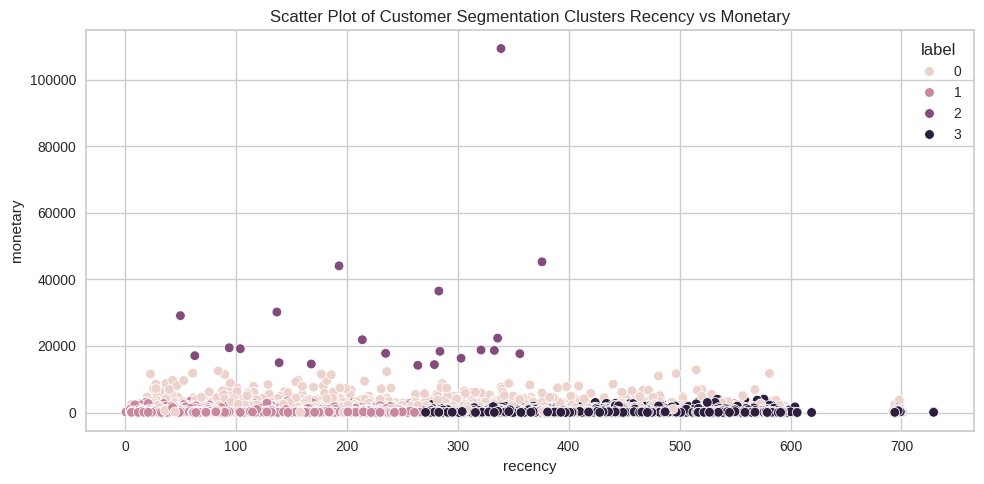

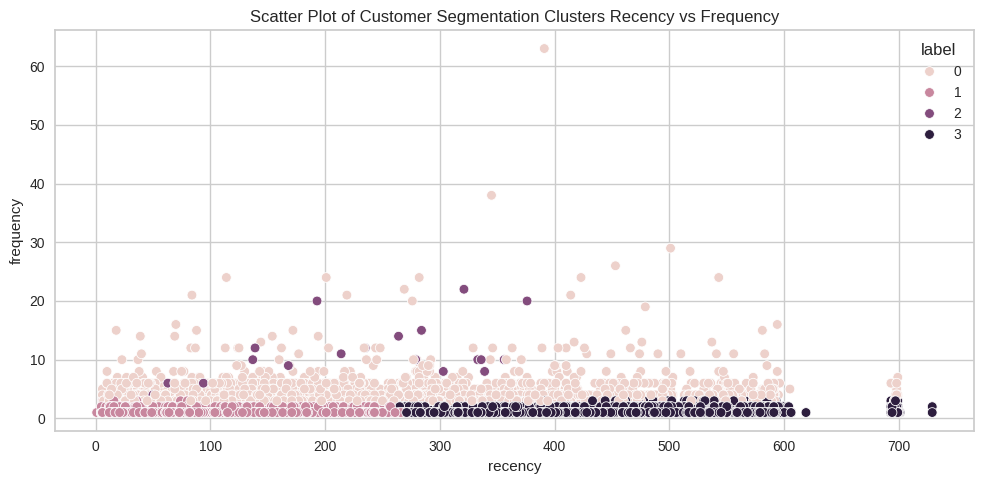

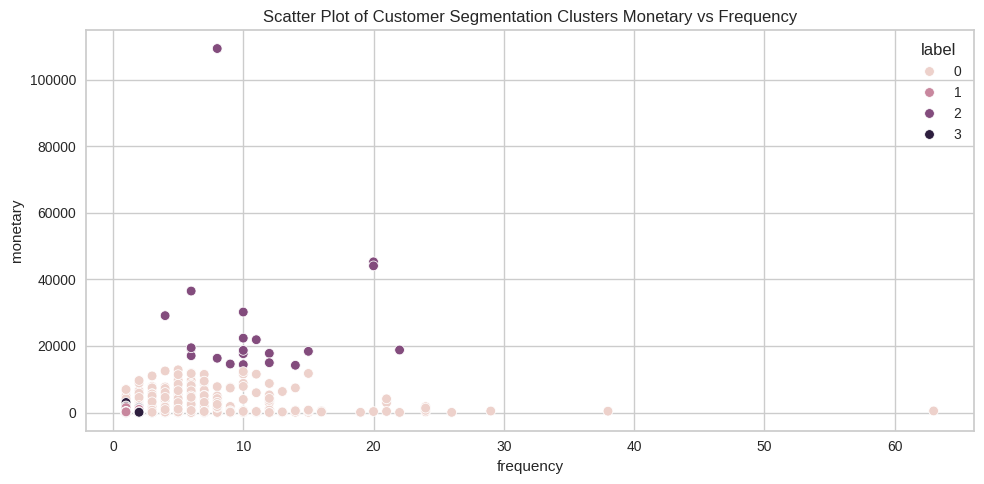

In [ ]:
# Show the cluster result by comparing each RFM feature
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_cust,x='recency',y='monetary',hue='label')
plt.title('Scatter Plot of Customer Segmentation Clusters Recency vs Monetary')
plt.tight_layout()

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_cust,x='recency',y='frequency',hue='label')
plt.title('Scatter Plot of Customer Segmentation Clusters Recency vs Frequency')
plt.tight_layout()

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_cust,x='frequency',y='monetary',hue='label')
plt.title('Scatter Plot of Customer Segmentation Clusters Monetary vs Frequency')
plt.tight_layout()

Based on the plot above, Olist customer segmentation can be divided into 4 groups:

- "Potential Loyalist": Customer who has high payment value and frequently purchase, labeled as cluster 0.

- "Big Spenders": Customer who frequently purchase with relatively high payment value, labeled as cluster 2.

- "At Risk": Customer who made last purchase 265 days ago or more and have relatively low payment value, labeled as cluster 3.

- "New Customers": Customer who recently purchase have relatively low frequency order and payment value, labeled as cluster 1.

In [ ]:
# Change cluster label
df_cust['label'] = df_cust['label'].replace({0:'Potential Loyalist', 1:'New Customers', 2:'Big Spenders', 3:'At Risk'})

# Merging df_cust with label to final df
df = df.merge(df_cust, how='left', on='customer_id')

df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2018-08-13  af07308b275d755c9edb36a90c618231   
4                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix  ...                        product_id  \
0                      3149  ...  87285b34884572647811a353c7ac498a   
1                      3149  ...  87285b34884572647811a353c7ac498a   
2                      3149  ...  87285b34884572647811a353c7ac498a   
3                     47813  ...  595fac2a385ac33a80bd5114aec74eb8   
4                     75265  ...  aa4383b373c6aca5d8797843e5594415   

                          seller_id  shipping_limit_date   price  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
1  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
2  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
3  289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27  118.70   
4  4869f7a5dfa277a7dca6462dcf3b52b2  2018-08-13 08:55:23  159.90   

   freight_value  product_category_name recency  frequency monetary  \
0           8.72             housewares     336          3    38.71   
1           8.72             housewares     336          3    38.71   
2           8.72             housewares     336          3    38.71   
3          22.76              perfumery      41          1   141.46   
4          19.22                   auto      27          1   179.12   

                label  
0  Potential Loyalist  
1  Potential Loyalist  
2  Potential Loyalist  
3       New Customers  
4       New Customers  

[5 rows x 33 columns]

In [ ]:
# Check if there is null in label
df['label'].isna().sum()

0

### 5.5 Cluster EDA

In [ ]:
# Create data frame top 3 category for each label
label_category = df.groupby(['label','product_category_name']).agg({
    'order_item_id':'sum'
}).reset_index().sort_values(by='order_item_id',ascending=False)

top3_category_label = label_category.groupby('label').head(3)
top3_category_label

label  product_category_name  order_item_id
131       New Customers          health_beauty         6328.0
95        New Customers         bed_bath_table         6324.0
7               At Risk         bed_bath_table         5005.0
154       New Customers         sports_leisure         4938.0
196  Potential Loyalist        furniture_decor         4343.0
66              At Risk         sports_leisure         3969.0
39              At Risk        furniture_decor         3694.0
167  Potential Loyalist         bed_bath_table         3334.0
205  Potential Loyalist             housewares         2757.0
77         Big Spenders  computers_accessories          327.0
74         Big Spenders                   auto          210.0
84         Big Spenders       office_furniture          157.0

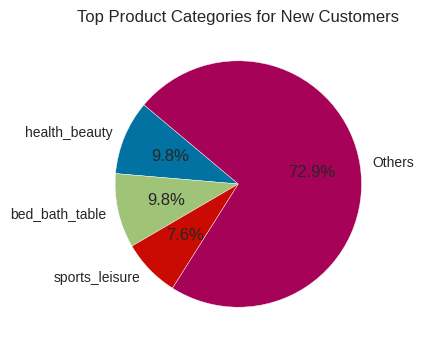

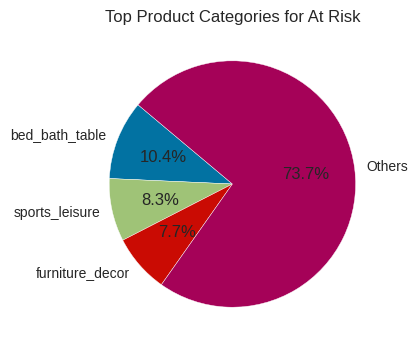

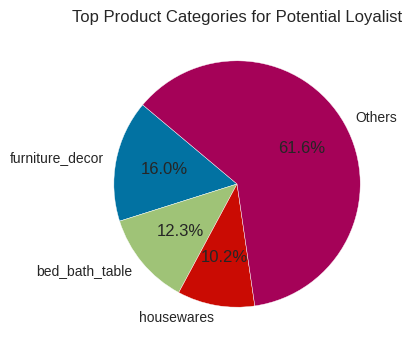

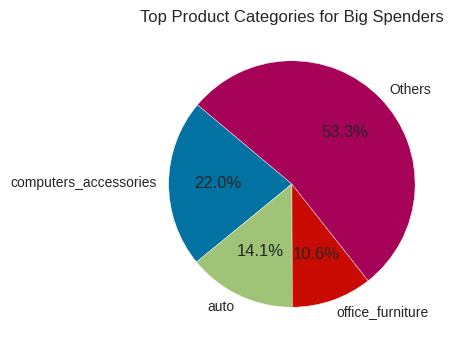

In [ ]:
for label in top3_category_label['label'].unique():
    label_data = top3_category_label[top3_category_label['label'] == label]

    # Calculate the sum of the remaining categories
    others_data = label_category[(label_category['label'] == label) & (~label_category['product_category_name'].isin(label_data['product_category_name']))]
    others_sum = others_data['order_item_id'].sum()

    # Prepare the data for the pie chart
    pie_data = pd.concat([label_data, pd.DataFrame({'product_category_name': ['Others'], 'order_item_id': [others_sum]})])

    plt.figure(figsize=(5, 4))
    plt.pie(pie_data['order_item_id'], labels=pie_data['product_category_name'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Top Product Categories for {label}')
    plt.show()

Observations:
1. bed_bath_table appears as top 3 product category in 3 clusters except **Big Spenders**
2.

In [ ]:
# Average review score for each customer
avg_reviews = df.groupby(['customer_id','label']).agg({
    'review_score':'mean'
})

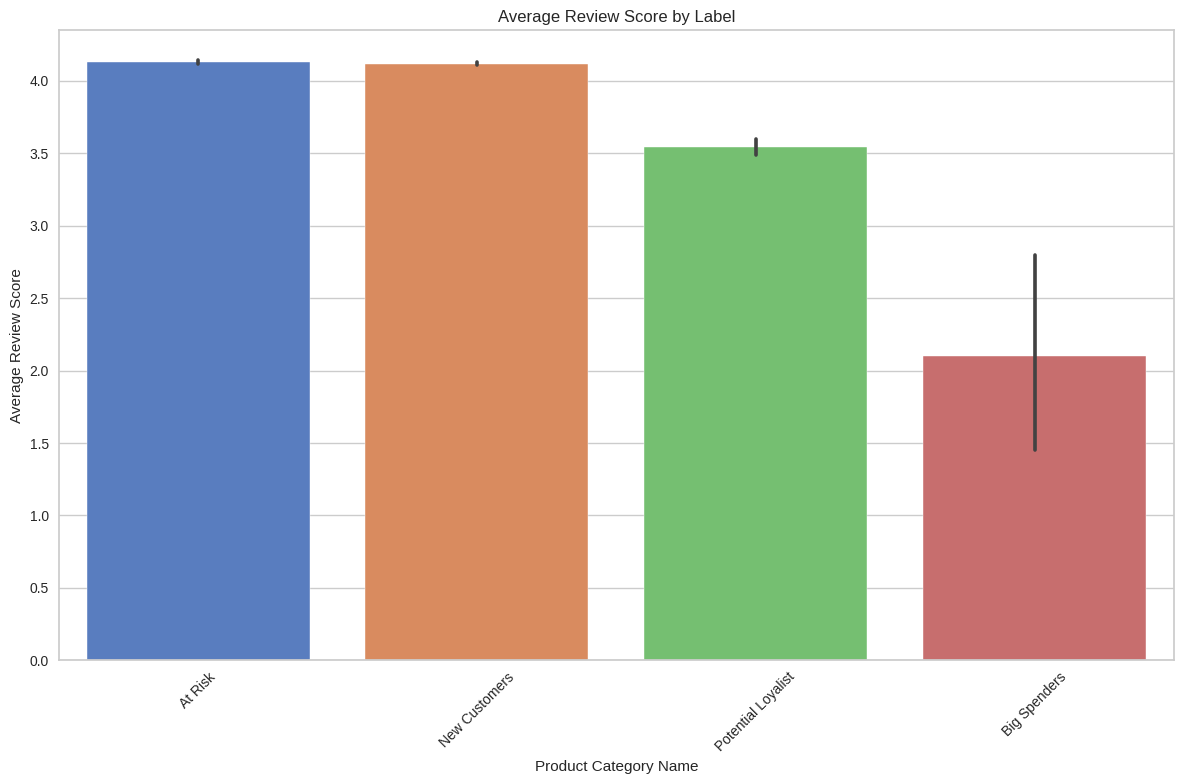

In [ ]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Create a bar plot for average review scores
sns.barplot(data=avg_reviews, x='label', y='review_score',estimator='mean', palette='muted')

# Set titles and labels
plt.title('Average Review Score by Label')
plt.xlabel('Product Category Name')
plt.ylabel('Average Review Score')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Observations:

1.

In [ ]:
label_city = df.groupby(['customer_city','label']).agg({
    'customer_id':lambda x: x.nunique()
    }).reset_index().sort_values(by='customer_id',ascending=False)
top5_city = label_city.groupby('label').head(3)
top5_city

customer_city               label  customer_id
6356       sao paulo       New Customers         9265
6354       sao paulo             At Risk         5649
5569  rio de janeiro       New Customers         3588
5567  rio de janeiro             At Risk         3026
792   belo horizonte       New Customers         1604
791   belo horizonte             At Risk         1074
6357       sao paulo  Potential Loyalist          485
5570  rio de janeiro  Potential Loyalist          217
793   belo horizonte  Potential Loyalist           72
5568  rio de janeiro        Big Spenders            3
6355       sao paulo        Big Spenders            3
7192      vila velha        Big Spenders            1

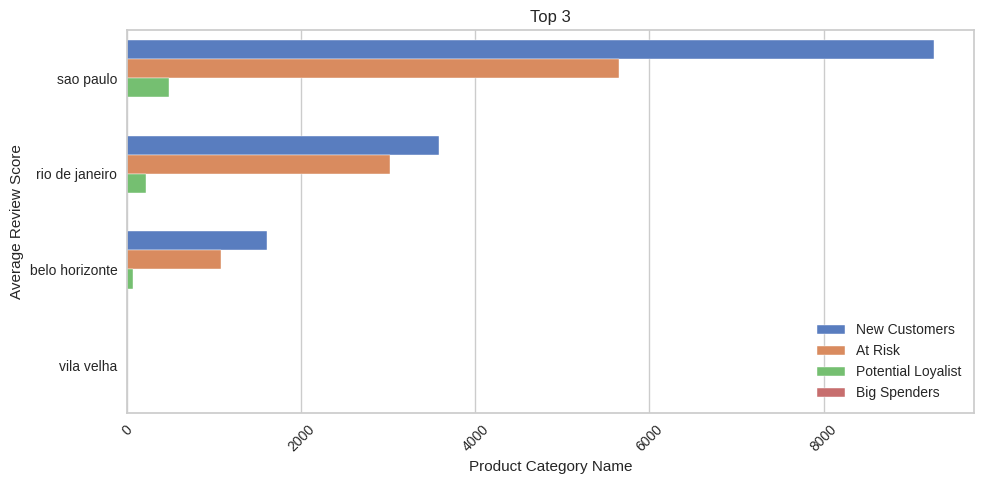

In [ ]:
# Set the plot size
plt.figure(figsize=(10, 5))

# Create a bar plot for average review scores
sns.barplot(data=top5_city, y='customer_city', x='customer_id',hue='label', palette='muted')

# Set titles and labels
plt.title('Top 3')
plt.xlabel('Product Category Name')
plt.ylabel('Average Review Score')
plt.legend(loc='lower right')
# Rotate x labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

---
<a id="fthoughts"></a>
## **6. Final Thoughts**

### **6.1 Conclusion**

**RFM Cluster Evaluation Results**: Most of our customers fall into the **New Customer** category with percentages of 55,99%. This is followed by **At Risk** (40,92%), **Potential Loyalist** (3,06%), and **Big Spender** (0,02%). The optimal number of clusters for this dataset was found to be K=4. These four clusters are:
  - **Cluster 0 [`Potential Loyalist`]**: Customers who consistently contribute to revenue with moderate to high Frequency (F) and Monetary (M) scores. They may not have purchased recently, resulting in a slightly lower Recency (R) score, but their past behavior shows strong potential to be a loyal customer.
    
  - **Cluster 1 [`New Customer`]**: Customers who have recently started engaging with the business, characterized by a high Recency (R) score. Their Frequency (F) and Monetary (M) scores are lower, reflecting that they are still in the early stages of their relationship with the brand.
    
  - **Cluster 2 [`Big Spender`]**: Customers who spend a significant amount of money, reflected by a high Monetary (M) score. However, they may have lower Recency (R) and Frequency (F) scores, indicating that while they spend big, they don't shop frequently or recently.
    
  - **Cluster 3 [`At Risk`]**: Customers who previously had high Frequency (F) and Monetary (M) scores but haven’t made a purchase in a while, leading to a low Recency (R) score. This indicates a risk of losing them if not re-engaged.

  [Customer Segmentation Reference](https://clevertap.com/blog/rfm-analysis/#analyzingrfmsegmentation)

Based on the cluster descriptions, several conclusions can be drawn about the customer segments:

1. **Diverse Customer Behavior**: The clusters indicate a wide range of customer behaviors, from high spenders who may not shop frequently to new customers who are just beginning their relationship with the business. This diversity suggests the need for tailored marketing strategies to effectively engage each segment.

2. **Retention Opportunities**: The **At Risk** and **Potential Loyalist** clusters highlight potential opportunities for customer retention. While **Potential Loyalist** have shown strong past engagement, their recent inactivity suggests they might need re-engagement strategies. Similarly, the **At Risk** customers, who have historically been valuable, may be at risk of churn if not targeted with appropriate retention efforts.

3. **Growth Potential**: The **New Customer** cluster represents potential for growth. These customers have just started engaging with the business, and there is an opportunity to nurture their relationship and increase their lifetime value by encouraging more frequent and higher-value purchases.

4. **Revenue Maximization**: The **Big Spender** cluster, despite their infrequent purchases, represents a significant revenue source due to their high spending. Marketing efforts could focus on increasing their purchase frequency or re-engaging them more regularly to maximize revenue from this segment.

5. **Strategic Marketing**: Each cluster requires a distinct marketing approach. **Big Spenders** may benefit from exclusive offers or loyalty rewards, **New Customers** from welcome campaigns or onboarding efforts, **Loyal Customers** from recognition and appreciation strategies, and **At Risk** customers from reactivation campaigns designed to reignite their interest.

These insights can help inform a data-driven marketing strategy that targets each customer segment with relevant, personalized campaigns, ultimately improving customer retention, engagement, and overall revenue.

### **6.2 Recommendation**

By implementing the RFM segmentation on our customers, we can sketch business scenario like below:
1. Scenario: After implementing RFM segmentations, marketing team launch a targeted marketing campaign.

2. KPI: Conversion rate and ROI

3. Groups:
- Control group: Marketing campaign sent to all the customers.
- Target group: Marketing campaign sent to customers in 'Potential Loyalist'

4. Conversion Rate:
- Control group: 2% Conversion rate, average order value (AOV) of R$50
- Target group: 5% Conversion rate, AOV of R%75

5. ROI calculation:
- Control group ROI: (2% Conversion rate * R$$50 AOV) = R$1 per Customer
- Target group ROI: (2% Conversion rate * R$75 AOV) = R$3.75 per Customer

6. Conclusion:
The RFM targeted campaign generated a 275% higher ROI than the non-segmented campaign, proving the effectiveness of RFM analysis.

### **6.3 Limitations**

1. **Outdated Data**:  
   The data used for RFM analysis may not reflect current customer behavior if it is outdated, leading to strategies that are no longer relevant. This limitation can be mitigated by continuously updating the dataset with the most recent information, ensuring that the analysis remains accurate and effective.

2. **Limited Variables**:  
   RFM analysis focuses on three key factors: Recency, Frequency, and Monetary value. While these are important indicators of customer behavior, they may not capture the full complexity of customer interactions. Other influential factors, such as customer demographics, product preferences, and engagement levels, are not considered, which could result in an incomplete understanding of customer behavior.

3. **Implementation Challenges**:  
   Translating the insights from segmentation into effective marketing actions can be challenging. Developing personalized marketing strategies for each segment may require significant resources, coordination, and effort. However, as shown in the analysis, even with these challenges, the benefits of segmentation far outweigh the costs, making it a more effective approach than doing nothing at all.


---